# Install Libraries

In [130]:
!pip install plotly
!pip install kneed

# Import Libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from scipy import stats

# Data Path

The datasets were loaded from a specific directory, preprocessed, and then saved for further use. The following datasets are saved after preprocessing:

- `X_train`, `X_test` (features)
- `y_train`, `y_test` (targets)

Example path:
```python
dataset_path = "/path/to/data/"


In [132]:
# Import the Google Colab drive module to access Google Drive files
from google.colab import drive

# Mount Google Drive to access files stored in it
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
# data_path: Path for loading raw data files
data_path = '/content/drive/MyDrive/Data Science & Decision Making/ce888_data_2025/Data/'

# preprocessed_data_path: Path for saving and downloading preprocessed data files
preprocessed_data_path = '/content/drive/MyDrive/Data Science & Decision Making/Preprocessed Data/'

# Initial Exploration of Individual Datasets

## Loading All Datasets

All four datasets, **Metadata A**, **Metadata B**, **Label**, and **Func**, are being loaded into the environment.  

Once loaded, each dataset will be examined individually.

In [134]:
# Load the datasets using the defined path
metadata_A = pd.read_excel(f'{data_path}METADATA_A.xlsx')
metadata_B = pd.read_excel(f'{data_path}METADATA_B.xlsx')
label = pd.read_excel(f'{data_path}LABELS.xlsx')
func = pd.read_csv(f'{data_path}FUNCTIONAL_CONNECTOME_MATRICES.csv')

## Displaying All Four Datasets  

The first few rows (**head**) of each dataset are displayed to verify that the data is loading correctly. Additionally, the **shape** of each dataset is checked to understand its dimensions and ensure consistency before merging.  



In [135]:
metadata_A.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0              28                         0                           6   
1              30                         0                          18   
2              29                         1                          14   
3              28                         6                          24   
4              28                         1                          18   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                           1                      5   
1                           6                      8   
2                           2                      8   
3                           4                     16   
4                           4                     11   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                          0                      5                      1   
1                          7                      8                     10   
2                          5                      7                      6   
3                          9                     10                      8   
4                          4                     10                      7   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                      0                 10                    NaN  
1                      4                  5                    NaN  
2                      4                  9               8.239904  
3                      4                  6                    NaN  
4                      3                  9               8.940679

In [136]:
metadata_A.shape

(1213, 19)

In [137]:
metadata_B.head()

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                        3                      15                      15   
2                        1                      18                      40   
3                        3                      15                      30   
4                        3                      15                      20   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                      21                      45  
1                       0                       0  
2                       0                       0  
3                      18                       0  
4                       0                       0

In [138]:
metadata_B.shape

(1213, 10)

In [139]:
label.head()

participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

In [140]:
label.shape

(1213, 3)

In [141]:
func.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.035335          0.068583  ...              0.003404   
1          0.077505         -0.004750  ...             -0.008409   
2          0.021198          0.083721  ...              0.053245   
3          0.075030          0.001033  ...             -0.023918   
4         -0.036403         -0.020375  ...              0.066439   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0             -0.010359             -0.050968             -0.014365   
1             -0.008479              0.020891              0.017754   
2             -0.028003              0.028773              0.024556   
3             -0.005356              0.018607              0.016193   
4             -0.076680             -0.047530             -0.031443   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.128066              0.112646             -0.058980   
1              0.094040              0.035141              0.032537   
2              0.166343              0.058925              0.035485   
3              0.072955              0.130135              0.056120   
4              0.221213              0.007343              0.005763   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.028228              0.133582              0.143372  
1              0.075007              0.115350              0.138200  
2              0.063661              0.042862              0.162162  
3              0.084784              0.114148              0.190584  
4              0.083820              0.079582              0.067269  

[5 rows x 19901 columns]

In [142]:
func.shape

(1213, 19901)

## Display All Four Datasets Datatypes

To ensure consistency, the **data types of all columns** across the datasets are examined.  
This helps verify if each column's data type matches its intended format, identifying any discrepancies that need correction.  


In [143]:
# Check the data types of metadata_A
print(metadata_A.dtypes)

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score            int64
APQ_P_APQ_P_CP                  int64
APQ_P_APQ_P_ID                  int64
APQ_P_APQ_P_INV                 int64
APQ_P_APQ_P_OPD                 int64
APQ_P_APQ_P_PM                  int64
APQ_P_APQ_P_PP                  int64
SDQ_SDQ_Conduct_Problems        int64
SDQ_SDQ_Difficulties_Total      int64
SDQ_SDQ_Emotional_Problems      int64
SDQ_SDQ_Externalizing           int64
SDQ_SDQ_Generating_Impact       int64
SDQ_SDQ_Hyperactivity           int64
SDQ_SDQ_Internalizing           int64
SDQ_SDQ_Peer_Problems           int64
SDQ_SDQ_Prosocial               int64
MRI_Track_Age_at_Scan         float64
dtype: object


In [144]:
# Check the data types of metadata_B
print(metadata_B.dtypes)

participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race           int64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu                int64
Barratt_Barratt_P1_Occ                int64
Barratt_Barratt_P2_Edu                int64
Barratt_Barratt_P2_Occ                int64
dtype: object


Insight:

The **PreInt_Demos_Fam_Child_Ethnicity** column is supposed to be a **categorical integer** but it appears as a **float**. This needs to be addressed to ensure proper categorical handling in analysis and modeling.  


In [145]:
# Check the data types of func
print(func.dtypes.unique())

[dtype('O') dtype('float64')]


In [146]:
# Check the data types of label
print(label.dtypes)

participant_id    object
ADHD_Outcome       int64
Sex_F              int64
dtype: object


Insight:  

The **ADHD_Outcome** column was originally expected to be a string based on the dataset description.  
However, it is already stored as an **integer**, which is beneficial for modeling.  
Since it aligns with our analysis needs, we can **keep it as it is** without conversion.  


## Copying Column Names for Metadata A, Metadata B, Label and Func  

The **column names** of **Metadata A**, **Metadata B**, **Label**, and **Func** have been copied for future reference.  
Since the datasets will eventually be merged, keeping track of the individual column names ensures that if any analysis needs to be done on the separate datasets after the merge, the original structure and features can still be accessed and understood.  
This will help maintain flexibility in analysis and preprocessing, allowing us to refer back to the column names if necessary.  



In [147]:
# Copying the column names from the 'metadata_A' dataframe
metadata_A_column_names = metadata_A.columns.copy()

# Printing the column names
print(metadata_A_column_names)

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')


In [148]:
# Copying the column names from the 'metadata_B' dataframe
metadata_B_column_names = metadata_B.columns.copy()

# Printing the column names
print(metadata_B_column_names)

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


In [149]:
# Copying the column names from the 'label' dataframe
label_column_names = label.columns.copy()

# Printing the column names
print(label_column_names)

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


In [150]:
# Copying the column names from the 'func' dataframe
func_column_names = func.columns.copy()

# Printing the column names
print(func_column_names)

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)


## Merging Metadata A, Metadata B, Label and Func Datasets

To merge the datasets **Metadata A**, **Metadata B**, **Label** and **Func**, an **inner join** has been performed using the common key column `participant_id`.  
This approach ensures that only the rows with matching `participant_id` values from all datasets are included in the final merged dataset, maintaining consistency across the data.  

The **inner join** is chosen to include only those participants present in all four datasets. If other types of joins (e.g., left or outer join) were used, additional rows with missing data might be introduced, which could lead to incomplete or biased analysis.  
Therefore, performing an inner join ensures that the merged dataset reflects only the participants available across all datasets.  


In [151]:
# Merge metadata_A and metadata_B on 'participant_id'
merged_metadata_AB = pd.merge(metadata_A, metadata_B, on='participant_id', how='inner')

# Merge the result with 'label' based on 'participant_id'
merged_metadata_AB_label = pd.merge(merged_metadata_AB, label, on='participant_id', how='inner')

# Finally, merge the above result with 'func' based on 'participant_id'
final_merged_data = pd.merge(merged_metadata_AB_label, func, on='participant_id', how='inner')

# Merge metadata_A and metadata_B with 'func' based on 'participant_id'
merged_metadata_AB_func = pd.merge(merged_metadata_AB, func, on='participant_id', how='inner')

Insight:

- **metadata_A**: `(1213, 19)`  
- **metadata_B**: `(1213, 10)`  
- **func**: `(1213, 19901)`  
- **label**: `(1213, 3)`  

Since all datasets contain **participant_id**, merging them will result in duplicate columns.  
After **dropping redundant `participant_id` columns**, the final dataset should have **19930 columns** (`19 + 10 + 19901 + 3 - 3 = 19930`).  





In [152]:
final_merged_data.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...  195throw_196thcolumn  \
0              28                         0  ...             -0.037630   
1              30                         0  ...              0.014106   
2              29                         1  ...             -0.040456   
3              28                         6  ...             -0.016356   
4              28                         1  ...             -0.056285   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0             -0.072599             -0.058396             -0.041544   
1             -0.001084             -0.025624             -0.031863   
2              0.018640              0.010771             -0.044341   
3              0.025618             -0.007152              0.032584   
4             -0.031508             -0.010196              0.035638   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.142806             -0.006377              0.108005   
1              0.162011              0.067439              0.017155   
2              0.128386              0.047282              0.087678   
3              0.121726              0.045089              0.154464   
4              0.074978              0.030579              0.025640   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.148327              0.093230             -0.004984  
1              0.088893              0.064094              0.194381  
2              0.146221             -0.009425              0.035150  
3              0.106817              0.065336              0.234708  
4              0.118199              0.112522              0.143666  

[5 rows x 19930 columns]

In [153]:
final_merged_data.shape

(1213, 19930)

Insight:

After merging all datasets, the final dataset **`final_merged_data`** has a shape of **(1213, 19930)**.  
This matches the expected number of columns, confirming that the merging process was done correctly.  


## Visualizing Unique Values of Each Column

The **unique values** in each column of the dataset are being visualized to understand the distribution of the data.  
This step helps in identifying distinct values and checking for any inconsistencies or unexpected values.  

An interactive table is created to display the unique values for each column, limiting to 5 values for columns with more than 5 unique values and showing the count of each unique value.  
Both **categorical** and **numerical** columns are included in the visualization to observe the differences in their distributions.

The **Func** dataset is excluded from this visualization, as it contains continuous data, which is not suitable for this type of categorical value visualization.  


In [154]:
def plot_unique_values_table(df):
    """Creates an interactive table displaying unique values for each column,
       limiting to 5 values for columns with more than 5 unique values, and showing the count."""

    # Extract unique values for each column
    unique_values_table = {}
    for col in df.columns:
        unique_values = df[col].dropna().unique()
        if len(unique_values) > 5:
            # Show first 5 values and count if more than 5 unique values
            unique_values_table[col] = (", ".join(map(str, unique_values[:5])), f"({len(unique_values)} unique values)")
        else:
            unique_values_table[col] = (", ".join(map(str, unique_values)), f"({len(unique_values)} unique values)")

    # Prepare the data for the table
    unique_values_df = pd.DataFrame(list(unique_values_table.items()), columns=["Column", "Unique Values & Count"])

    # Create the table using plotly
    fig = ff.create_table(unique_values_df)

    # Disable zoom and other interactions
    fig.show(config={"scrollZoom": False, "displayModeBar": False})

In [155]:
# Example usage
plot_unique_values_table(merged_metadata_AB_label.drop(columns=['participant_id']))

Insight:

The **MRI_Track_Scan_Location** and **Barratt_Barratt_P1_Edu** columns in the **metadata_B** dataset are categorical and are expected to have specific values:

- **Barratt_Barratt_P1_Edu** should contain **7 unique categories** but there are **8 categories** observed.
- **MRI_Track_Scan_Location** should have **4 unique categories** but there are **5 categories** observed.

These discrepancies in the number of unique values will be addressed during preprocessing. We will carefully examine these columns for any unexpected categories and handle them appropriately to ensure the dataset is consistent and accurate for further analysis.


 ## Checking for Missing Values in Rows  

To ensure data quality, identifying and visualizing rows that contain **NaN (missing values)**.

In [156]:
# Check for missing values (NaNs) in the 'metadata_A' DataFrame
nan_counts = metadata_A.isna().sum()  # This will count the number of NaNs in each column of 'metadata_A'

# Print the count of missing values for each column
print(nan_counts)  # Displays the number of missing (NaN) values for each column in 'metadata_A'

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [157]:
# Check for missing values (NaNs) in the 'metadata_B' DataFrame
nan_counts = metadata_B.isna().sum()  # This will count the number of NaNs in each column of 'metadata_B'

# Print the count of missing values for each column
print(nan_counts)  # Displays the number of missing (NaN) values for each column in 'metadata_B'

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [158]:
# Check if there are any NaN values in the 'func' DataFrame
has_nan = func.isna().any().any()  # Checks if any NaN values exist in the entire DataFrame

# Print result
if has_nan:
    print("There are NaN values in 'func'.")
else:
    print("No NaN values in 'func'.")

No NaN values in 'func'.


In [159]:
# Check for missing values (NaNs) in the 'label' DataFrame or Series
nan_counts = label.isna().sum()  # This will count the number of NaNs in each column of 'label'

# Print the count of missing values for each column
print(nan_counts)  # Displays the number of missing (NaN) values for each column in 'label'

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


Insight:

- **`MRI_Track_Age_at_Scan`** in **Metadata_A** has **360 missing values**.  
- **`PreInt_Demos_Fam_Child_Ethnicity`** in **Metadata_B** has **11 missing values**.  

These missing values will be handled in later preprocessing steps.  


# Splitting the Final Merged Data into Training and Testing Sets  

The **final_merged_data** will be split into training and testing sets using a 70-30 ratio. 70% of the data will be used for training, and 30% will be reserved for testing. This ensures the model has enough data for training while also providing a fair evaluation of its performance.  

### **Code Breakdown**:
- **`y = label.copy()`**: The target variable (**y**) is copied from the **label** DataFrame, which contains the values the model needs to predict.  
- **`X = final_merged_data.copy()`**: The input features (**X**) are copied from the **final_merged_data** DataFrame, which contains the merged data from the metadata and functional datasets.

### **Data Splitting**:  
The dataset is split into training and testing sets using the **train_test_split** function, which randomly divides the data. This ensures that the model is trained on a majority of the data, with a separate portion reserved for testing its performance.

### **Why Split Before Preprocessing**:
Splitting the data before any preprocessing is crucial because:
- **Avoids Data Leakage**: If preprocessing (like normalization or imputation) is done before splitting, information from the test set might influence the training set, causing biased results.
- **Simulates Real-World Scenario**: By splitting first, you ensure that the test set represents data that the model has never seen before, which mimics real-world predictions.
- **Preserves Validity**: Ensures that transformations like scaling, encoding, or imputation are based only on the training data, preserving the integrity of the model evaluation.


In [160]:
# Create a copy of the labels to avoid modifying the original data
y = label.copy()

# Create a copy of the merged dataset to use as features
X = merged_metadata_AB_func.copy()

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [161]:
# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (849, 19928)
Testing data shape: (364, 19928)
Training labels shape: (849, 3)
Testing labels shape: (364, 3)


### Insight from the 70-30 Split on the `final_merged_data` Dataset

After performing the 70-30 split on the **final_merged_data** dataset, which initially had a shape of **1213 x 19930**, the resulting datasets are as follows:

- **Training Set (X_train, y_train)**:
  - **X_train**: **849 x 19928**  
  - **y_train**: **849 x 3**  

- **Testing Set (X_test, y_test)**:  
  - **X_test**: **364 x 19928**  
  - **y_test**: **364 x 3**  

This ensures that the data has been properly divided for training and testing, maintaining the correct proportions for model evaluation. The number of features in the training and testing sets remains consistent, while the target labels are appropriately split as well.


# Creating Separate DataFrames for Specific Columns

New dataframes (**metadata_A_copy**, **metadata_B_copy**, **func_copy**, **label_copy**) are created by filtering the columns from **X_train** based on specific prefixes like `'metadata_A_'`, `'metadata_B_'`, etc.  
This process involves selecting the columns whose names start with a particular string and saving them into new variables.  

By doing this, we can separate out the relevant parts of the dataset, such as metadata or functional data and work with them independently for further analysis or modeling.


In [162]:
# Create a new dataframe with only the 'metadata_A' columns
metadata_A_copy = X_train[metadata_A_column_names]
metadata_A_copy.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
215    PFQTomzEXBwj          100.0                    14               4   
482    Z5T4f6OHLTaQ          100.0                    14               3   
27     2AlLf4SXlT1q          100.0                    14               3   
1169   DCAeqLbQa173          -60.0                    14               4   
762    XC6aisOM0WzL          100.0                     1               3   

      APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
215               16               40               21              14   
482               14               37               22              23   
27                12               49               20              14   
1169              14               43               22              14   
762               15               36               18              14   

      APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
215               29                         4                          20   
482               25                         3                          23   
27                30                         3                          24   
1169              26                         0                           1   
762               23                         1                           8   

      SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
215                            5                     13   
482                            5                     13   
27                             9                     10   
1169                           0                      1   
762                            2                      5   

      SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
215                           7                      9                      7   
482                           4                     10                     10   
27                           10                      7                     14   
1169                          0                      1                      0   
762                           8                      4                      3   

      SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
215                       2                  6               8.324663  
482                       5                  7               8.532397  
27                        5                  9               8.894136  
1169                      0                  8              11.574264  
762                       1                  9               9.657996

In [163]:
metadata_A_copy.shape

(849, 19)

Insight:

Since the **metadata_A** dataset originally has a shape of **1213 x 19**, the copied version (**metadata_A_copy**) also has a shape of **1213 x 19**. After splitting into training and testing sets, the training data has **849 rows**, so the copied version for the training set will maintain the same structure with **849 rows** and **19 columns**.


In [164]:
# Create a new dataframe with only the 'metadata_B' columns
metadata_B_copy = X_train[metadata_B_column_names]
metadata_B_copy.head()

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
215    PFQTomzEXBwj                     2018                       3   
482    Z5T4f6OHLTaQ                     2019                       3   
27     2AlLf4SXlT1q                     2018                       1   
1169   DCAeqLbQa173                     2016                       1   
762    XC6aisOM0WzL                     2017                       1   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
215                                0.0                            0   
482                                0.0                            1   
27                                 0.0                            3   
1169                               0.0                            0   
762                                0.0                            0   

      MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
215                         3                      18                      30   
482                         3                      18                      15   
27                          2                      18                      45   
1169                        1                      18                       0   
762                         2                      12                      20   

      Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
215                       18                      30  
482                        0                       0  
27                        18                      30  
1169                      12                      35  
762                       12                      35

In [165]:
metadata_B_copy.shape

(849, 10)

Insight:

Since the **metadata_B** dataset originally has a shape of **1213 x 10**, the copied version (**metadata_B_copy**) also has a shape of **1213 x 10**. After splitting into training and testing sets, the training data has **849 rows**, so the copied version for the training set will maintain the same structure with **849 rows** and **10 columns**.


In [166]:
# Create a new dataframe with only the 'func' columns
func_copy = X_train[func_column_names]
func_copy.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
215    PFQTomzEXBwj         -0.115876          0.093212          0.114033   
482    Z5T4f6OHLTaQ         -0.030853          0.138601         -0.026528   
27     2AlLf4SXlT1q          0.085616          0.084408         -0.049874   
1169   DCAeqLbQa173          0.048340          0.126596          0.053806   
762    XC6aisOM0WzL         -0.097413          0.137145          0.094751   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
215          -0.013014          0.041800          0.087214          0.084612   
482           0.082550          0.116241          0.000182          0.066770   
27            0.058389          0.056941          0.083061          0.033865   
1169          0.081970          0.074060          0.187671         -0.004033   
762           0.066920          0.092059          0.115725          0.011812   

      0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
215          -0.001516          0.012835  ...              0.007307   
482           0.001845         -0.028234  ...              0.060308   
27           -0.096167          0.079006  ...              0.013395   
1169          0.058913         -0.020986  ...              0.007907   
762           0.023348          0.071434  ...              0.006838   

      195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
215               0.020003             -0.084868             -0.047226   
482               0.024728             -0.099719             -0.014572   
27               -0.008303             -0.075866              0.050936   
1169              0.004290             -0.021981              0.043081   
762               0.073382             -0.048473              0.108313   

      196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
215               0.088641              0.071246              0.049397   
482               0.164294              0.122121              0.096856   
27                0.028340              0.100522              0.070918   
1169              0.170645              0.014778              0.105322   
762               0.122671             -0.011637             -0.010449   

      197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
215               0.078388              0.100777              0.047007  
482               0.111172              0.057193              0.194637  
27                0.072771              0.087623              0.107107  
1169              0.068343              0.009609              0.110860  
762               0.033015              0.080493              0.143904  

[5 rows x 19901 columns]

In [167]:
func_copy.shape

(849, 19901)

Insight:

Since the **func** dataset originally has a shape of **1213 x 19901**, the copied version (**func_copy**) also has a shape of **1213 x 19901**. After splitting into training and testing sets, the training data has **849 rows**, so the copied version for the training set will maintain the same structure with **849 rows** and **19901 columns**.


In [168]:
# Create a new dataframe with only the 'label' columns
label_copy = y_train[label_column_names]
label_copy.head()

participant_id  ADHD_Outcome  Sex_F
215    PFQTomzEXBwj             1      0
482    Z5T4f6OHLTaQ             1      0
27     2AlLf4SXlT1q             1      1
1169   DCAeqLbQa173             0      0
762    XC6aisOM0WzL             1      0

In [169]:
label_copy.shape

(849, 3)

Insight:

Since the **label** dataset originally has a shape of **1213 x 3**, the copied version (**label_copy**) also has a shape of **1213 x 3**. After splitting into training and testing sets, the training data has **849 rows**, so the copied version for the training set will maintain the same structure with **849 rows** and **3 columns**.


# Exploration and Preprocessing of Metadata A

The exploration of **Metadata A** has been initiated to understand its structure and content.  
This includes **data cleaning, preprocessing and detailed exploration** to identify missing values, inconsistencies, and patterns within the dataset.  
By performing these steps, the dataset is prepared for further analysis and modeling.  



## Data Preprocessing and Cleaning for MRI_Track_Age_at_Scan

We have observed that the **MRI_Track_Age_at_Scan** column contains **360 NaN** values, which need to be addressed in order to ensure the dataset is ready for further analysis and modeling. Handling missing values is crucial because:

- **Incomplete data** can introduce biases, distort statistical relationships, and negatively impact model performance.
- **NaN values** in the target column, such as **MRI_Track_Age_at_Scan**, can prevent the model from making accurate predictions and hinder the overall effectiveness of the analysis.

To maintain the integrity of the data and preserve patterns in the dataset, it is necessary to employ a strategy for **imputing** or **handling** these missing values. The approach taken will ensure that the model receives a complete and accurate set of features for training and testing.  



### Identifying Outliers in MRI_Track_Age_at_Scan Using a Box Plot

To determine if there are any outliers in the `MRI_Track_Age_at_Scan` column, a **box plot** can be used.  
Box plots are effective for visualizing the spread of data and identifying values that fall outside the typical range. Outliers are typically represented as points that lie beyond the "whiskers" of the box plot, which correspond to the upper and lower bounds of the data.

By generating a box plot, it will be easier to spot if any extreme values are present, which may need further attention or removal based on the analysis context.  

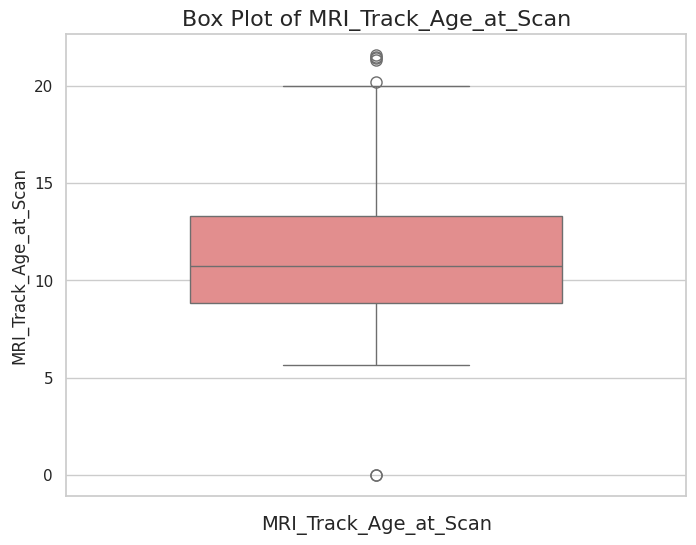

In [170]:
# Set a modern seaborn style
sns.set(style="whitegrid")

# Create a more refined box plot with customized colors and additional details
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.boxplot(y=metadata_A_copy["MRI_Track_Age_at_Scan"], color="lightcoral", width=0.6, fliersize=8)

# Title and labels
plt.title("Box Plot of MRI_Track_Age_at_Scan", fontsize=16)
plt.xlabel("MRI_Track_Age_at_Scan", fontsize=14)

# Show the plot
plt.show()

Insight:


After plotting the box plot for the **MRI_Track_Age_at_Scan** column, we observe a few **extreme lower values** that deviate significantly from the rest of the data. These need to be handled carefully, as they could be errors or unrealistic entries.

Additionally, there are **upper outliers** that fall within a reasonable range but may still need closer inspection.

To ensure accurate analysis, we will examine the **count** and **value** of these outliers, allowing us to make informed decisions on how to handle them.


### Handling Outliers in MRI_Track_Age_at_Scan Based on Box Plot

To effectively handle the **lower** and **upper outliers**, we need to inspect the specific values to gain a better understanding. Therefore, we will calculate the **lower and upper quantiles** of the data to identify these outliers and make informed decisions about how to treat them.


In [171]:
# Compute IQR (Interquartile Range)
Q1 = metadata_A_copy["MRI_Track_Age_at_Scan"].quantile(0.25)
Q3 = metadata_A_copy["MRI_Track_Age_at_Scan"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds (1.5 * IQR method)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to get the lower outliers (values below lower bound)
lower_outliers = metadata_A_copy[metadata_A_copy["MRI_Track_Age_at_Scan"] < lower_bound]

# Filter the dataset to get merged_df upper outliers (values above upper bound)
upper_outliers = metadata_A_copy[metadata_A_copy["MRI_Track_Age_at_Scan"] > upper_bound]

# Sort the lower and upper outliers
lower_outliers_sorted = lower_outliers[["MRI_Track_Age_at_Scan"]].sort_values(by="MRI_Track_Age_at_Scan")
upper_outliers_sorted = upper_outliers[["MRI_Track_Age_at_Scan"]].sort_values(by="MRI_Track_Age_at_Scan")

#### **Lower Outliers**:
- Two **lower outliers** were identified, with values significantly lower than the minimum value (the lower whisker) of the box plot. Upon inspection, these values represent an age of **0**, which is highly unlikely and suggests a data entry error.
- **Action Taken**: These outliers will be treated as **NaN (missing values)** for further analysis and imputation. This helps ensure the dataset remains accurate and avoids potential distortions in the model caused by implausible values.

In [172]:
lower_outliers_sorted

MRI_Track_Age_at_Scan
1192                    0.0
64                      0.0

In [173]:
# Replace matching values with NaN
metadata_A_copy.loc[
    metadata_A_copy["MRI_Track_Age_at_Scan"].isin(lower_outliers_sorted["MRI_Track_Age_at_Scan"]),
    "MRI_Track_Age_at_Scan"
] = np.nan

# Display the updated DataFrame
metadata_A_copy.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
215    PFQTomzEXBwj          100.0                    14               4   
482    Z5T4f6OHLTaQ          100.0                    14               3   
27     2AlLf4SXlT1q          100.0                    14               3   
1169   DCAeqLbQa173          -60.0                    14               4   
762    XC6aisOM0WzL          100.0                     1               3   

      APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
215               16               40               21              14   
482               14               37               22              23   
27                12               49               20              14   
1169              14               43               22              14   
762               15               36               18              14   

      APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
215               29                         4                          20   
482               25                         3                          23   
27                30                         3                          24   
1169              26                         0                           1   
762               23                         1                           8   

      SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
215                            5                     13   
482                            5                     13   
27                             9                     10   
1169                           0                      1   
762                            2                      5   

      SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
215                           7                      9                      7   
482                           4                     10                     10   
27                           10                      7                     14   
1169                          0                      1                      0   
762                           8                      4                      3   

      SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
215                       2                  6               8.324663  
482                       5                  7               8.532397  
27                        5                  9               8.894136  
1169                      0                  8              11.574264  
762                       1                  9               9.657996

In [174]:
metadata_A_copy.shape

(849, 19)

Insight:

After handling the lower outliers in the **MRI_Track_Age_at_Scan** column, the shape of the dataset **metadata_A_copy** should still be **849 x 19**, confirming that the outlier treatment did not affect the overall structure of the data. This ensures the integrity of the dataset for further analysis.


#### **Upper Outliers**:
- The **upper outliers** are closer to the upper whisker and are relatively near the highest observed values. These outliers fall within the age range of **20-22 years**, which is a plausible age for adolescents.
- **Rationale**: According to the **World Health Organization (WHO)**, adolescence spans from **10 to 24 years**, so ages in the range of 20-22 years are considered normal.
- **Action Taken**: As these values are within a reasonable age range for children and adolescents, we will **keep them in the dataset**. These values likely represent genuine variations in age and do not warrant removal.

In [175]:
upper_outliers_sorted

MRI_Track_Age_at_Scan
811               20.171115
718               21.334702
930               21.416723
1150              21.463609
653               21.564453

### Merging label_copy with metadata_A_copy to Create merged_df

The **label_copy** dataset is merged with **metadata_A_copy** to create the **merged_df**.  
This step is important because the **label** (target variable) will be helpful in predicting the missing values of **MRI_Track_Age_at_Scan** through imputation. By using the label, the model can leverage existing patterns in the target variable to make more informed predictions for the missing values in the **MRI_Track_Age_at_Scan** column.  

Merging these datasets also ensures that the **label** information is properly aligned with the rest of the data for imputation and further analysis.  


In [176]:
# Merge the label data with the metadata_A_copy dataframe on 'participant_id'
merged_A_with_labels = pd.merge(label_copy, metadata_A_copy, on="participant_id", how="inner")

# Display the resulting merged dataframe
merged_A_with_labels

participant_id  ADHD_Outcome  Sex_F  EHQ_EHQ_Total  ColorVision_CV_Score  \
0     PFQTomzEXBwj             1      0         100.00                    14   
1     Z5T4f6OHLTaQ             1      0         100.00                    14   
2     2AlLf4SXlT1q             1      1         100.00                    14   
3     DCAeqLbQa173             0      0         -60.00                    14   
4     XC6aisOM0WzL             1      0         100.00                     1   
..             ...           ...    ...            ...                   ...   
844   aIT44s8hVX8o             0      1          13.34                     0   
845   tBP9frgzqhFI             0      0         -53.34                     0   
846   8EV0j5wVb8ZW             0      1          40.07                    14   
847   teOipnrXHuIG             0      0          20.00                    14   
848   iUjl7ihgmyZu             0      1          46.67                    14   

     APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  \
0                 4              16               40               21   
1                 3              14               37               22   
2                 3              12               49               20   
3                 4              14               43               22   
4                 3              15               36               18   
..              ...             ...              ...              ...   
844               4              18               37               17   
845               3               8               43               16   
846               3              13               41               14   
847               3              10               46               13   
848               3              12               43               13   

     APQ_P_APQ_P_PM  ...  SDQ_SDQ_Conduct_Problems  \
0                14  ...                         4   
1                23  ...                         3   
2                14  ...                         3   
3                14  ...                         0   
4                14  ...                         1   
..              ...  ...                       ...   
844              18  ...                         4   
845              14  ...                         0   
846              10  ...                         1   
847              14  ...                         1   
848              23  ...                         0   

     SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  \
0                            20                           5   
1                            23                           5   
2                            24                           9   
3                             1                           0   
4                             8                           2   
..                          ...                         ...   
844                          17                           6   
845                           2                           1   
846                           2                           0   
847                           8                           2   
848                           0                           0   

     SDQ_SDQ_Externalizing  SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
0                       13                          7                      9   
1                       13                          4                     10   
2                       10                         10                      7   
3                        1                          0                      1   
4                        5                          8                      4   
..                     ...                        ...                    ...   
844                      8                          3                      4   
845                      0                          0                      0   
846                      2              

### Handling Missing Values in MRI_Track_Age_at_Scan

The **MRI_Track_Age_at_Scan** column initially had 360 NaN values, but now, it contains **362 NaN** values due to the treatment of lower outliers as NaN. Removing these rows would result in a significant loss of data, which could negatively impact the analysis. Given that **age** is an important feature, we cannot use simple techniques like forward fill, backward fill, or interpolation, as these methods would not be suitable for **age** values and may introduce inaccuracies. A more sophisticated imputation method, such as using the mean, median, or modeling, should be considered to handle these missing values effectively.


### Why Imputation over Mean/Mode?

Imputation methods, such as using **Random Forest** or **KNN**, allow us to preserve the underlying patterns in the data. These methods generate predictions based on relationships in the dataset, while imputing with mean or mode distorts the distribution of the data, which could negatively impact model performance and accuracy.

### Why Random Forest over KNN?

- **Random Forest** is better suited for this task because it can capture complex relationships in the data, especially when dealing with high-dimensional datasets, like the one we have.
- **KNN**, on the other hand, relies on local similarity and struggles with high-dimensional data. It might not be able to effectively model the complex relationships needed to accurately predict missing age values.

### Conclusion

Given the complexity of the data and the importance of preserving patterns, we will use **Random Forest** for imputing the missing **MRI_Track_Age_at_Scan** values. This method will allow us to replace the **NaN** values in a way that maintains the integrity of the dataset and improves the accuracy of subsequent analyses.  

In [177]:
# Save the original 'participant_id' before encoding (optional, for reference)
original_participant_id = merged_A_with_labels['participant_id'].copy()

# Convert the 'participant_id' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
merged_A_with_labels['participant_id'] = label_encoder.fit_transform(merged_A_with_labels['participant_id'])

# Separate rows with missing values and non-missing values
train_df = merged_A_with_labels[merged_A_with_labels['MRI_Track_Age_at_Scan'].notna()]
test_df = merged_A_with_labels[merged_A_with_labels['MRI_Track_Age_at_Scan'].isna()]

# Select the features (drop the target variable and other non-numeric columns)
X_train_copy = train_df.drop(columns=['MRI_Track_Age_at_Scan'])  # Features (excluding target and identifier)
y_train_copy = train_df['MRI_Track_Age_at_Scan']  # Target variable

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train_copy, y_train_copy)

# Select the features for the rows with missing values
X_test_copy = test_df.drop(columns=['MRI_Track_Age_at_Scan'])

# Predict missing values using the trained Random Forest model
predicted_values = rf_regressor.predict(X_test_copy)

# Impute the missing values
merged_A_with_labels.loc[merged_A_with_labels['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = predicted_values

# Reverse the LabelEncoder transformation to restore the original 'participant_id'
merged_A_with_labels['participant_id'] = label_encoder.inverse_transform(merged_A_with_labels['participant_id'])

# Check if imputation is successful
print(f"Remaining missing values in the dataset: {merged_A_with_labels['MRI_Track_Age_at_Scan'].isna().sum()}")

Remaining missing values in the dataset: 0


#### Verifying and Visualizing the Quality of Imputed Values  

To ensure that the imputed values are reasonable, we compare the imputed values with the original non-missing data. Although the true values for the rows with NaNs are not available, this comparison through a **scatter plot** allows us to visually inspect the quality of the imputation.  



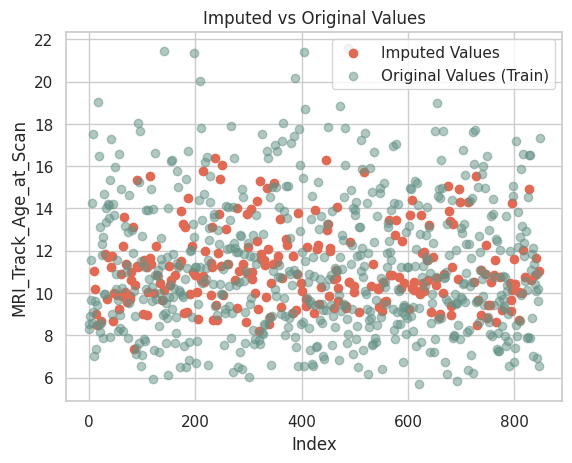

In [178]:
# Visualize the imputed values
plt.scatter(test_df.index, predicted_values, label='Imputed Values', color='#E16A54')
plt.scatter(train_df.index, y_train_copy, label='Original Values (Train)', color='#659287', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('MRI_Track_Age_at_Scan')
plt.legend()
plt.title('Imputed vs Original Values')
plt.show()

Insight:

The plot reveals that the imputed values align closely with the original non-missing data, indicating that the imputation method used is reasonable. With this confirmation, we can proceed with the analysis, as the imputation has not introduced significant discrepancies.

### Updating MRI_Track_Age_at_Scan in metadata_A  

The **MRI_Track_Age_at_Scan** column in **metadata_A** needs to be updated with values from **merged_A_with_labels** based on the **participant_id** identifier. This ensures that the latest processed values are correctly reflected in the **metadata_A** dataset while maintaining data consistency.


In [179]:
# Merge metadata_A_copy with merged_A_with_labels on 'participant_id'
metadata_A_copy = merged_A_with_labels.merge(
    merged_A_with_labels[['participant_id', 'MRI_Track_Age_at_Scan']],
    on='participant_id',
    how='left',
    suffixes=('', '_updated')  # This will avoid name conflicts if needed
)

# Now the old column can be replaced in metadata_A_copy with the updated one from the merge
metadata_A_copy['MRI_Track_Age_at_Scan'] = metadata_A_copy['MRI_Track_Age_at_Scan_updated']

# Drop the extra column if needed
metadata_A_copy.drop(columns=['MRI_Track_Age_at_Scan_updated', 'ADHD_Outcome', 'Sex_F'], inplace=True)

In [180]:
metadata_A_copy.shape

(849, 19)

In [181]:
# Check if there are any NaN values in the MRI_Track_Age_at_Scan column
metadata_A_copy['MRI_Track_Age_at_Scan'].isna().sum()

np.int64(0)

## Visualizing the Distribution of Numerical Features Using a Violin Plot

A **violin plot** is used to visualize the distribution of numerical features in **merged_df**. This type of plot provides several insights:

- **Density of the data**: The shape of the violin shows where data points are concentrated, helping identify patterns such as skewness, multimodality, or the presence of outliers.
- **Comparison across features**: The plot allows us to compare the distributions of different features, providing a better understanding of how each feature is spread out or clustered.
- **Visual appeal**: The color palette and transparency used in the plot enhance its aesthetic and make it easier to interpret, allowing for a clearer distinction between different features.

This visualization is helpful for understanding the general behavior of the numerical data and detecting potential issues that may need further handling or preprocessing.


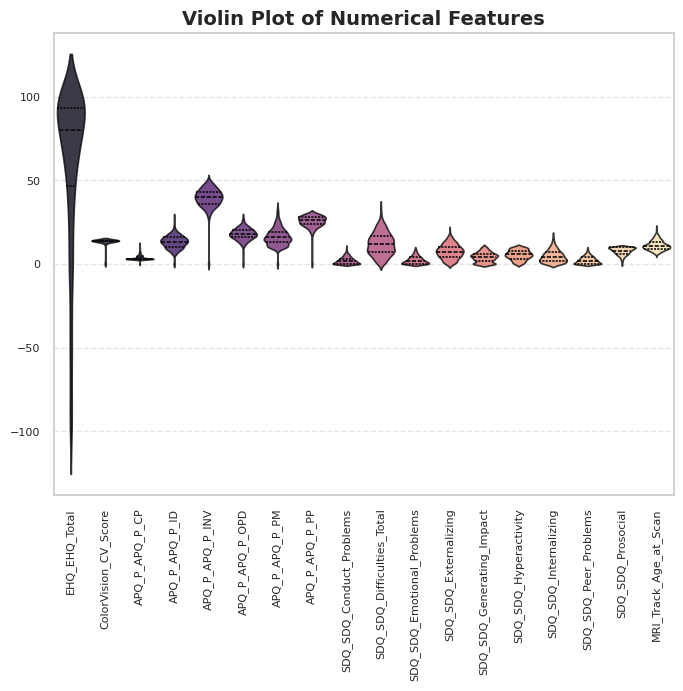

In [182]:
plt.figure(figsize=(8, 6))

# Drop 'participant_id' column before plotting
metadata_without_participant_id = metadata_A_copy.drop(columns=['participant_id'])

# Generate the color palette and plot
palette = sns.color_palette("magma", n_colors=len(metadata_without_participant_id.columns))
ax = sns.violinplot(data=metadata_without_participant_id, palette=palette, linewidth=1.2, inner="quartile")

# Customize the plot
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=8)
plt.title("Violin Plot of Numerical Features", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add subtle grid lines

# Adjust transparency manually (workaround for alpha)
for violin in ax.collections:
    violin.set_alpha(0.8)  # Make the violins slightly transparent

plt.show()

### Handling EHQ_EHQ_Total Distribution

The **EHQ_EHQ_Total** column has a unique distribution ranging from -100 to 100, which differs from other features in the dataset. The values indicate handedness, with negative values representing left-handedness and positive values representing right-handedness. The distribution can be categorized as follows:

1. **Outliers**: Extreme values (like -100 or 100) may be potential outliers, but they have specific meanings in the context of handedness and should be retained.

2. **Data Transformation**: Given the nature of this feature, it may be useful to **categorize** it instead of treating it as a continuous variable. This will make it easier to interpret and analyze, particularly when predicting handedness or understanding its relationship with other features.

3. **Handedness Categories**: Using ranges defined by the Edinburgh Handedness Inventory (https://www.brainmapping.org/shared/Edinburgh.php), values from -100 to 100 are divided into categories such as:
   - **10th Left** for -100
   - **9th Left** for values between -100 and -92
   - Continuing through to **10th Right** for 100.

This categorization will allow for more straightforward analysis of handedness and provide meaningful groupings for any downstream modeling.

In [183]:
# Define function to categorize values based on the provided ranges
def categorize_li(value):
    if value == -100:
        return 1  # 10th Left
    elif -100 < value <= -92:
        return 2  # 9th Left
    elif -92 < value <= -90:
        return 3  # 8th Left
    elif -90 < value <= -87:
        return 4  # 7th Left
    elif -87 < value <= -83:
        return 5  # 6th Left
    elif -83 < value <= -76:
        return 6  # 5th Left
    elif -76 < value <= -66:
        return 7  # 4th Left
    elif -66 < value <= -54:
        return 8  # 3rd Left
    elif -54 < value <= -42:
        return 9  # 2nd Left
    elif -42 < value <= -28:
        return 10  # 1st Left
    elif -28 <= value < 48:
        return 11  # Middle
    elif 48 <= value < 60:
        return 12  # 1st Right
    elif 60 <= value < 68:
        return 13  # 2nd Right
    elif 68 <= value < 74:
        return 14  # 3rd Right
    elif 74 <= value < 80:
        return 15  # 4th Right
    elif 80 <= value < 84:
        return 16  # 5th Right
    elif 84 <= value < 88:
        return 17  # 6th Right
    elif 88 <= value < 92:
        return 18  # 7th Right
    elif 92 <= value < 95:
        return 19  # 8th Right
    elif 95 <= value < 100:
        return 20  # 9th Right
    elif value == 100:
        return 21  # 10th Right
    else:
        return "Unknown"

In [184]:
# Apply categorization
metadata_A_copy['EHQ_EHQ_Total'] = metadata_A_copy['EHQ_EHQ_Total'].apply(categorize_li)

In [185]:
metadata_A_copy.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   PFQTomzEXBwj             21                    14               4   
1   Z5T4f6OHLTaQ             21                    14               3   
2   2AlLf4SXlT1q             21                    14               3   
3   DCAeqLbQa173              8                    14               4   
4   XC6aisOM0WzL             21                     1               3   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              16               40               21              14   
1              14               37               22              23   
2              12               49               20              14   
3              14               43               22              14   
4              15               36               18              14   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0              29                         4                          20   
1              25                         3                          23   
2              30                         3                          24   
3              26                         0                           1   
4              23                         1                           8   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                           5                     13   
1                           5                     13   
2                           9                     10   
3                           0                      1   
4                           2                      5   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                          7                      9                      7   
1                          4                     10                     10   
2                         10                      7                     14   
3                          0                      1                      0   
4                          8                      4                      3   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                      2                  6               8.324663  
1                      5                  7               8.532397  
2                      5                  9               8.894136  
3                      0                  8              11.574264  
4                      1                  9               9.657996

## Plotting Correlation Plot to Visualize Data Relationships

A **correlation plot** is being generated to visualize the relationships between the different variables in the dataset.  
This helps in identifying which features are strongly correlated with each other, and it can reveal patterns, dependencies, or potential multicollinearity.  
The plot will display correlation coefficients, where values closer to 1 or -1 indicate strong correlations, and values closer to 0 suggest weak correlations.  
By examining the plot, further insights can be gained on how the features relate to each other.  


In [186]:
def plot_correlation_heatmap(df, exclude_cols=None, cmap="magma", figsize=(10, 8), annot_size=10):
    """
    Plots a correlation heatmap for a given dataframe, excluding specified columns.

    Parameters:
    - df: DataFrame, the input dataset.
    - exclude_cols: list, columns to exclude from the correlation analysis (default: None).
    - cmap: str, colormap for the heatmap (default: "magma").
    - figsize: tuple, figure size (default: (10, 8)).
    - annot_size: int, font size for annotation (default: 10).
    """
    # Exclude specified columns (if any)
    if exclude_cols is not None:
        df = df.drop(columns=exclude_cols)

    # Compute correlation matrix
    corr_matrix = df.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the figure
    plt.figure(figsize=figsize)

    # Draw the heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        linewidths=1,
        linecolor="gray",
        mask=mask,
        annot_kws={"size": annot_size}
    )

    # Formatting
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
    plt.show()

The columns **ADHD_Outcome**, **Sex_F**, and **EHQ_EHQ_Total** are excluded from the correlation heatmap analysis because they are categorical or non-numeric.

Pearson correlation is designed to measure linear relationships between **continuous numerical** variables. It is not suitable for categorical data, as it assumes numeric values and continuous distributions. Including these categorical columns in the correlation analysis could distort the results.

By excluding these columns, we focus the correlation analysis on **numerical features**, providing more accurate insights into relationships between the relevant variables.


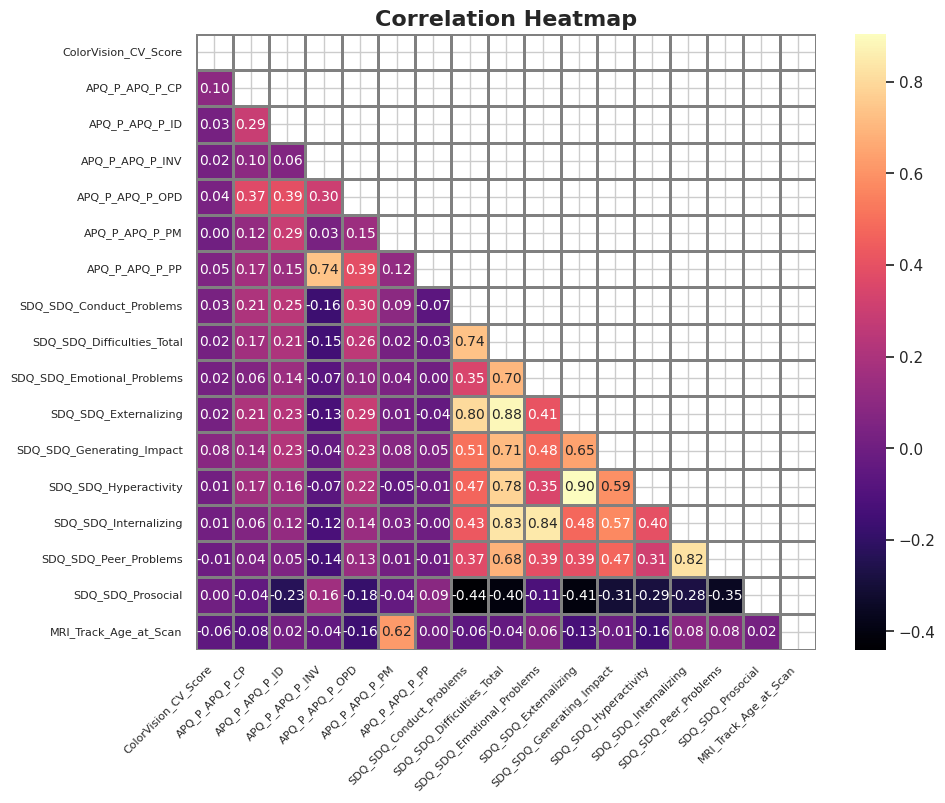

In [187]:
# Usage example:
exclude_columns = ['participant_id', 'EHQ_EHQ_Total']  # List categorical and identifier columns to exclude
plot_correlation_heatmap(metadata_A_copy, exclude_cols=exclude_columns)

Insight:

We observe that the following columns have very high correlations:

- **SDQ_SDQ_Externalizing** and **SDQ_SDQ_Hyperactivity** with a correlation of **0.90**.
- **SDQ_SDQ_Difficulties_Total** and **SDQ_SDQ_Externalizing** with a correlation of **0.88**.

Due to the high correlation between these columns, keeping all of them could lead to **multicollinearity**, where redundant information is included in the model. This can negatively impact model performance by causing overfitting and instability in the coefficient estimates.

### Reason for Dropping Specific Columns

- **SDQ_SDQ_Difficulties_Total** and **SDQ_SDQ_Hyperactivity** will be dropped because they are highly correlated with **SDQ_SDQ_Externalizing**, meaning they provide almost identical information. Retaining both would add unnecessary complexity to the model.
  
- **SDQ_SDQ_Externalizing** will be kept as it is the key column with a strong explanatory power and can encapsulate the relevant information from both **SDQ_SDQ_Hyperactivity** and **SDQ_SDQ_Difficulties_Total**. Since the **Externalizing** trait is central to the analysis, it provides the best representation of these features while reducing redundancy.

By dropping the highly correlated columns and keeping **SDQ_SDQ_Externalizing**, we ensure that the model remains efficient and focused on the most informative variables.


### Dropping Highly Correlated Columns  

The columns **SDQ_SDQ_Hyperactivity** and **SDQ_SDQ_Difficulties_Total** are dropped due to high correlation with other features in the dataset.  

#### Reason for Dropping:
- Strong correlation was observed between these columns and other variables.
- Keeping highly correlated features can introduce redundancy and multicollinearity, potentially affecting model performance.
- Removing these columns helps in reducing dimensionality while retaining essential information.

By eliminating these columns, we ensure a more efficient and interpretable dataset for further analysis and modeling.

In [188]:
# Create a set of columns to drop
columns_to_drop = ['SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Difficulties_Total']

# Drop the identified columns
metadata_A_copy = metadata_A_copy.drop(columns=columns_to_drop)

## Excluding Categorical Columns and Performing Pair Plot Analysis  

After visualizing the **correlation heatmap**, we have identified and excluded categorical columns (**ADHD_Outcome**, **Sex_F**, and **EHQ_EHQ_Total**) since Pearson correlation is not applicable to categorical data.  

Now, we proceed with a **pair plot analysis** to explore potential relationships between numerical features. While correlation values provide a **statistical measure** of relationships, pair plots allow us to **visually inspect patterns**, such as **clusters, linear trends, or non-linear associations**, that may not be apparent from correlation alone.  

This step helps in identifying potential feature relationships that could be valuable for further analysis and modeling.


In [189]:
def plot_pairplot(df, exclude_cols=None):
    """
    Plot a pair plot for numerical columns in the DataFrame (lower triangle only).

    Parameters:
    - df: DataFrame to plot the pair plot from.
    - exclude_cols: List of columns to exclude from the pair plot (default: None).
    """
    # Exclude specified columns (if any) from numerical columns
    if exclude_cols is not None:
        df = df.drop(columns=exclude_cols)

    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Pair plot for numerical columns (only lower triangle to avoid repetition)
    sns.pairplot(df[numerical_cols], corner=True, kind="reg")  # Adds regression lines
    plt.show()

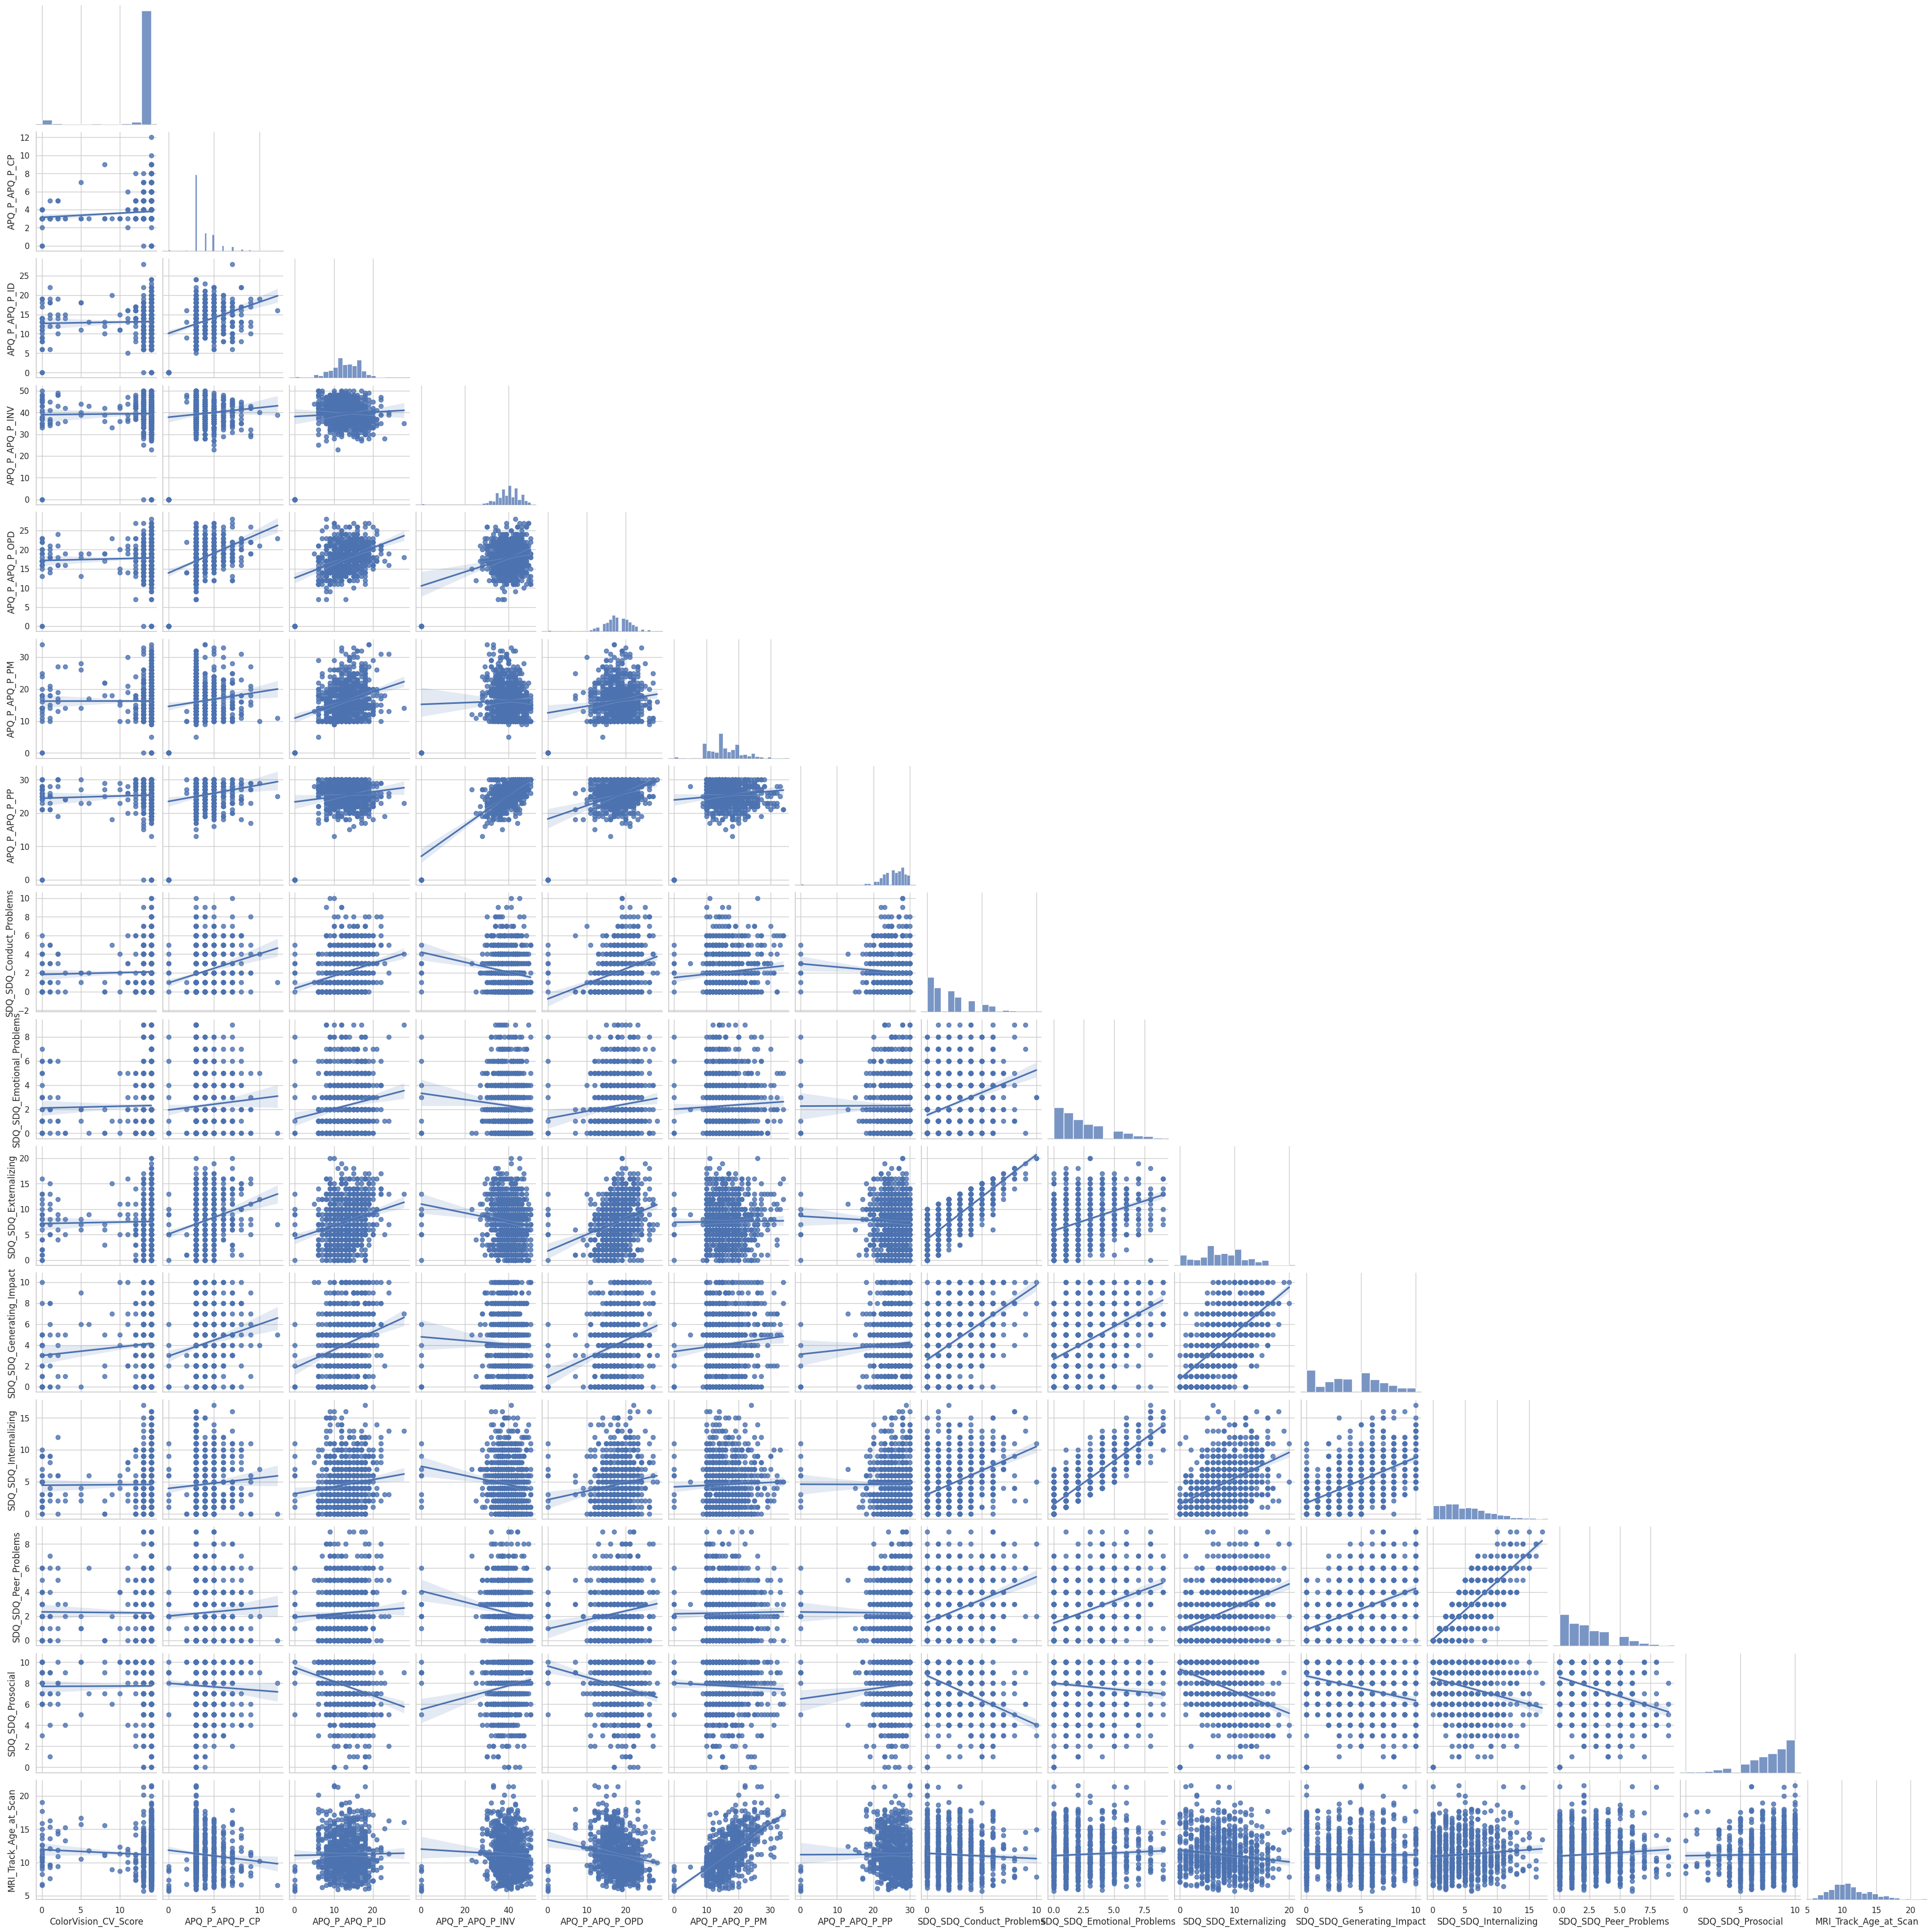

In [190]:
# Usage example:
plot_pairplot(metadata_A_copy, exclude_cols=exclude_columns)

Insight:


After dropping the highly correlated columns (**SDQ_SDQ_Difficulties_Total**, **SDQ_SDQ_Hyperactivity**), we plotted a **pair plot** to visualize the relationships between the remaining features.

The pair plot now shows more distinct and meaningful relationships between the variables, with no multicollinearity issues. The removal of redundant features has made the dataset cleaner and more suitable for modeling.

The visual inspection confirms that the dataset is now in a better state for further analysis and modeling. All relationships appear clearer and more interpretable, making the next steps in the process much more reliable.


## Visualizing the Distribution of Merged Data  

A **histogram** is plotted for `metadata_A` to analyze the distribution of numerical features in the dataset.  

#### Purpose:
- **Identify Data Distribution**: Understand whether the data follows a normal, skewed, or multimodal distribution.
- **Detect Outliers**: Spot extreme values that may impact analysis or model performance.
- **Feature Scaling Decisions**: Help determine if normalization or transformation is required for certain variables.

This visualization provides insights into the overall structure of the dataset, aiding in further preprocessing and feature engineering.

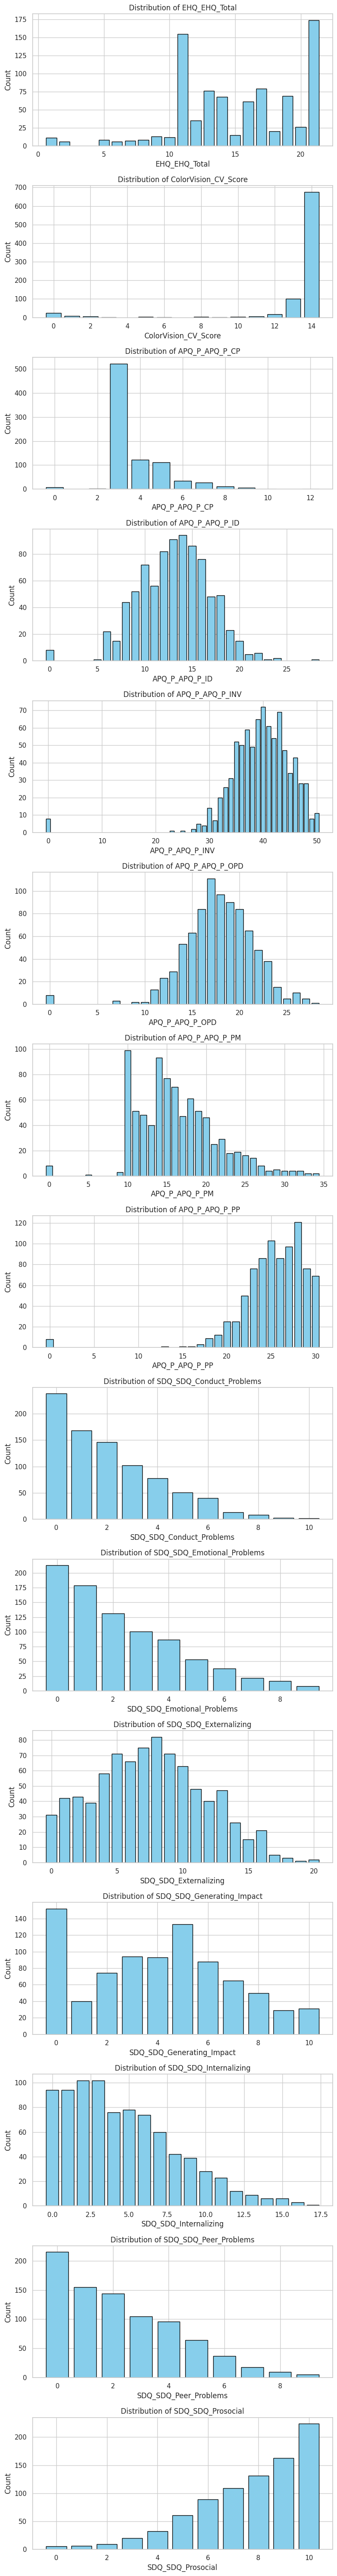

In [191]:
# Exclude 'MRI_Track_Age_at_Scan' and plot identifier
filtered_cols = [col for col in metadata_A_copy.columns if col != 'MRI_Track_Age_at_Scan' and col != 'participant_id']

fig, axes = plt.subplots(nrows=len(filtered_cols), figsize=(8, 4 * len(filtered_cols)))

for i, col in enumerate(filtered_cols):
    if metadata_A_copy[col].dtype in ['int64', 'float64']:  # Ensure it's numerical
        value_counts = metadata_A_copy[col].value_counts().sort_index()  # Get unique values

        axes[i].bar(value_counts.index, value_counts.values, color="skyblue", edgecolor="black")
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

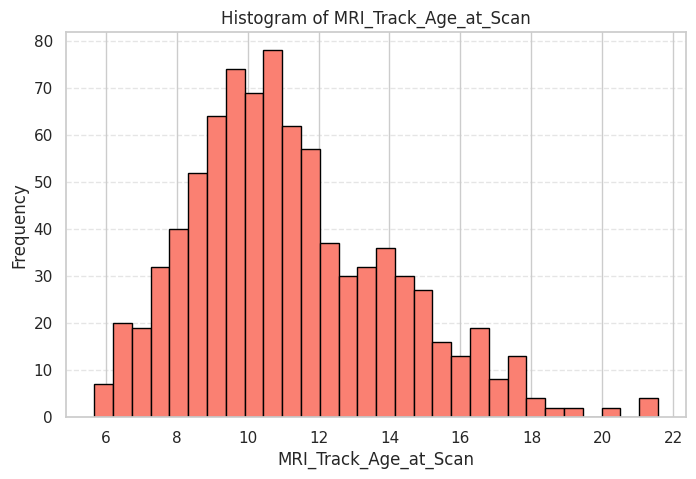

In [192]:
# Separate histogram for 'MRI_Track_Age_at_Scan' since it's continuous float data
plt.figure(figsize=(8, 5))
plt.hist(metadata_A_copy['MRI_Track_Age_at_Scan'].dropna(), bins=30, color="salmon", edgecolor="black")
plt.title("Histogram of MRI_Track_Age_at_Scan")
plt.xlabel("MRI_Track_Age_at_Scan")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insight:

We visualized the distribution of values in **`metadata_A`** using histograms. Notably, **`MRI_Track_Age_at_Scan`** was treated differently as it is a continuous (float) variable, while other columns were treated as categorical and plotted accordingly.

- **`MRI_Track_Age_at_Scan`**: A histogram was plotted to visualize its distribution, revealing the spread of age values in the dataset.
- **Other Columns**: For categorical variables, histograms were used to show the frequency distribution of each category, highlighting the diversity of the data.

The visualizations provide valuable insights into the distributions of these variables, allowing us to identify any patterns or imbalances in the data.


## Verifying the Final Size of `metadata_A` (Training Set)

After completing all preprocessing steps on the training set, it's crucial to confirm that the size of **`metadata_A`** is as expected.

### **Expected Shape of `metadata_A` (Training Set)**:
- **Rows**: **849** (corresponding to 70% of the original data)
- **Columns**: **17** (After dropping 2 columns)

This ensures that **`metadata_A`** has been correctly processed and is aligned with the final structure for use in model training and evaluation.


In [193]:
metadata_A_copy.shape

(849, 17)

# Exploration and Preprocessing of Metadata B

The exploration of **Metadata B** has been initiated to understand its structure and content.  
This includes **data cleaning, preprocessing and detailed exploration** to identify missing values, inconsistencies, and patterns within the dataset.  
By performing these steps, the dataset is prepared for further analysis and modeling.  



## Analyzing Mismatched Unique Values in `Barratt_Barratt_P1_Edu` and `MRI_Track_Scan_Location`

### **Objective:**
Visualize the discrepancies in unique values in the **Barratt_Barratt_P1_Edu** (expected 7 categories) and **MRI_Track_Scan_Location** (expected 4 categories) columns.

### **Approach:**
1. **Count Unique Values**: We will first count how many unique values exist in both columns to identify any discrepancies.
2. **Plotting**: Create bar plots to visualize the unique value counts and check for any unexpected categories.
3. **Insight**: By comparing the expected categories (7 for **Barratt_Barratt_P1_Edu** and 4 for **MRI_Track_Scan_Location**) with the actual ones, we can spot any mismatched or extra categories.

### **Visualizing the Data:**
- For **Barratt_Barratt_P1_Edu**, expect 7 unique categories, but an anomaly may show extra or fewer categories.
- For **MRI_Track_Scan_Location**, expect 4 unique categories. Any additional categories can be spotted through the plot.

### **Benefit of Visualization:**
This approach helps to:
- Identify any categories that shouldn't be present.
- Understand the distribution of values in the dataset.
- Plan for preprocessing steps such as correcting or dropping mismatched categories.


In [194]:
# For Barratt_Barratt_P1_Edu
barratt_unique = metadata_B_copy['Barratt_Barratt_P1_Edu'].value_counts()

# For MRI_Track_Scan_Location
scan_location_unique = metadata_B_copy['MRI_Track_Scan_Location'].value_counts()

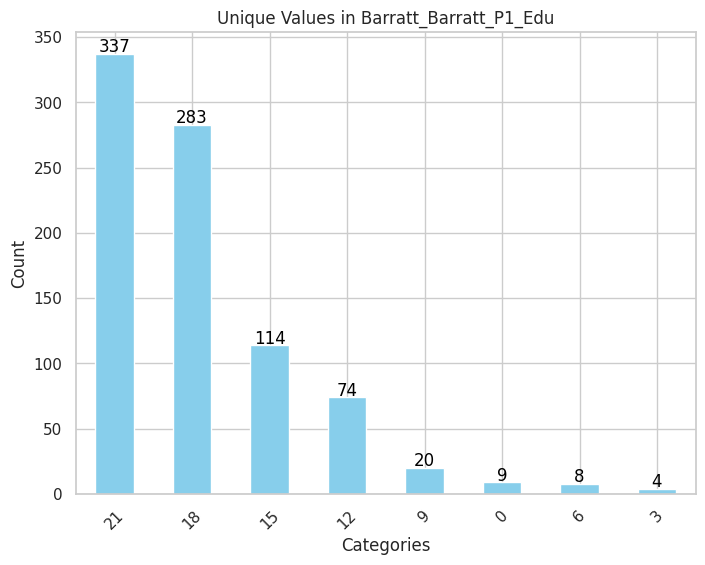

In [195]:
# Plot for Barratt_Barratt_P1_Edu
plt.figure(figsize=(8, 6))
ax1 = barratt_unique.plot(kind='bar', color='skyblue')
plt.title('Unique Values in Barratt_Barratt_P1_Edu')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=12, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.show()

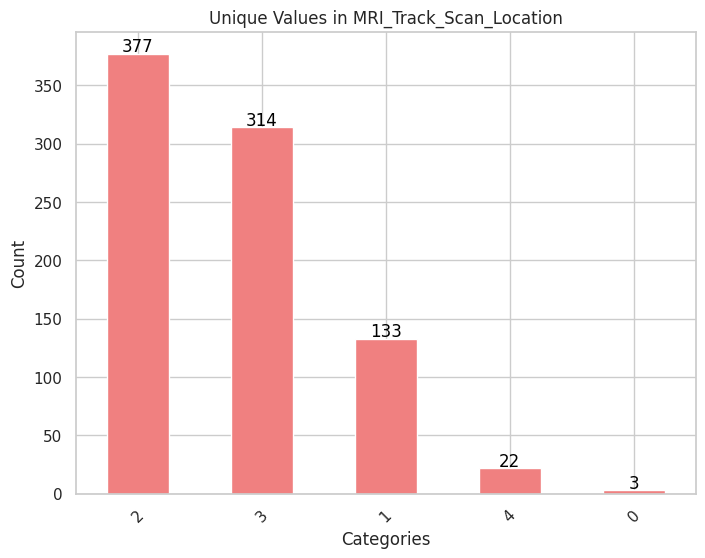

In [196]:
# Plot for MRI_Track_Scan_Location
plt.figure(figsize=(8, 6))
ax2 = scan_location_unique.plot(kind='bar', color='lightcoral')
plt.title('Unique Values in MRI_Track_Scan_Location')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=12, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.show()

Insight:

In both the **`Barratt_Barratt_P1_Edu`** and **`MRI_Track_Scan_Location`** columns, we found values of **0**, which are not listed in the dataset details.

However, the dataset specifies that values of **0** in certain columns are categorized as "unknown." Based on this, we can also assume that in these two columns, **0** indicates an "**unknown**" category.


## Column Name Renaming for Improved Clarity
To improve readability and enhance visualization, **column names are being renamed**. This step helps in making the dataset more interpretable, especially when dealing with complex or lengthy column names. Clear and concise column names will facilitate better analysis and model interpretation.

In [197]:
# Rename columns for readability
plot_df = metadata_B_copy.rename(columns={
    "Basic_Demos_Enroll_Year": "Enroll Year",
    "Basic_Demos_Study_Site": "Study Site",
    "PreInt_Demos_Fam_Child_Ethnicity": "Ethnicity",
    "PreInt_Demos_Fam_Child_Race": "Race",
    "MRI_Track_Scan_Location": "Scan Location",
    "Barratt_Barratt_P1_Edu": "Parent 1 Edu",
    "Barratt_Barratt_P1_Occ": "Parent 1 Occ",
    "Barratt_Barratt_P2_Edu": "Parent 2 Edu",
    "Barratt_Barratt_P2_Occ": "Parent 2 Occ"
})

## Data Preprocessing and Cleaning for PreInt_Demos_Fam_Child_Ethnicity  

The **PreInt_Demos_Fam_Child_Ethnicity** column contains **NaN** values, which need to be addressed to prepare the dataset for further analysis and modeling. Handling missing values is critical because:

- **Incomplete data** can lead to biases, distort statistical relationships, and negatively affect model performance.
- **NaN values** in important columns like **PreInt_Demos_Fam_Child_Ethnicity** can disrupt analysis and prevent the model from making accurate predictions.

Since this is a categorical column and one of the categories is **'Unknown'** (with a value of 0), we can treat the **NaN values** as **0**, representing the 'Unknown' category. This approach maintains the integrity of the data and avoids the issues associated with missing values.

By addressing the missing values this way, we ensure the column is fully populated and ready for modeling, while respecting the nature of the data.


### Handling Missing Values in PreInt_Demos_Fam_Child_Ethnicity  

The **participant_id** values with **NaN** in the **PreInt_Demos_Fam_Child_Ethnicity** column are missing in the **metadataB** dataset but exist in the **Func** dataset. So we cannot drop the rows with **NaN** values of **metadataB** dataset

Since we cannot drop these rows, we need an alternative approach to handle the missing values.  

The column contains the following categorical values:  
- **0** = Not Hispanic or Latino  
- **1** = Hispanic or Latino  
- **2** = Declined to specify  
- **3** = Unknown  

Since **3 represents "Unknown"**, we can replace all **NaN values with 3** to maintain data integrity without losing valuable information.


In [198]:
metadata_B_copy['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3, inplace=True)
metadata_B_copy.shape

<ipython-input-198-f2f5116f00de>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(849, 10)

 ### Converting `PreInt_Demos_Fam_Child_Ethnicity` to Categorical Integer

Converting the **PreInt_Demos_Fam_Child_Ethnicity** column from **float** to **int** to treat it as categorical data. This enables better compatibility with models that require categorical variables to be represented as integers.


In [199]:
# Convert 'PreInt_Demos_Fam_Child_Ethnicity' column from float to int in the 'metadata_B_copy' DataFrame
metadata_B_copy['PreInt_Demos_Fam_Child_Ethnicity'] = metadata_B_copy['PreInt_Demos_Fam_Child_Ethnicity'].astype(int)

metadata_B_copy.shape

(849, 10)

## Creating a Parallel Sets Diagram for Categorical Variables  

A **Parallel Sets Diagram** (also known as a **Parallel Categories Plot**) is being created using **Plotly Express**  
to visualize relationships between categorical variables in the dataset.  

### Purpose of the Parallel Sets Diagram  
- Relationships between categorical variables such as **enrollment year, study site, ethnicity, race, scan location, and parental education/occupation** are being explored.  
- Category flows across different variables are shown, which helps trends and distributions to be identified.  
- An **interactive** experience is provided, where counts and relationships can be viewed by hovering over different categories.  


#### When to Use:
- **High-Dimensional Data**: Especially when working with more than three dimensions.
- **Comparing Multiple Categories**: Ideal for exploring how categorical variables influence each other.
- **Outlier Detection**: Useful for detecting unique or rare data points.
- **Data Preprocessing for Machine Learning**: Aids in visualizing and cleaning data before model training.

In [200]:
# Ensure all necessary columns exist before plotting
expected_columns = [
    "Enroll Year", "Study Site", "Ethnicity", "Race", "Scan Location",
    "Parent 1 Edu", "Parent 1 Occ", "Parent 2 Edu", "Parent 2 Occ"
]
plot_df = plot_df[expected_columns]  # Select only relevant columns

# Create Parallel Sets Diagram
fig = px.parallel_categories(plot_df,
                             dimensions=plot_df.columns,
                             color_continuous_scale=px.colors.sequential.Inferno)

# Update layout to avoid overlapping labels
fig.update_layout(
    autosize=False,
    width=1300,  # Slightly wider
    height=750,  # Slightly taller
    margin=dict(l=120, r=120, t=100, b=100),  # Add margins
)

# Show plot
fig.show()

Insight:

### Example: A Data Point’s Path through Categorical Variables
To illustrate how an individual is categorized across various attributes, here’s an example breakdown of a data point:

- **Enroll Year** → 2019  
- **Study Site** → 4  
- **Ethnicity** → 1  
- **Race** → 11  
- **Scan Location** → 4  
- **Parent 1 Education** → 21  
- **Parent 1 Occupation** → 35  
- **Parent 2 Education** → 0 (Unknown)  
- **Parent 2 Occupation** → 0 (Unknown)  

### **Why This Matters?**
This visualization provides a structured view of how categorical variables define an individual. It helps in understanding patterns, identifying missing or unknown values, and exploring relationships across different demographic and MRI-related factors.


## Visualizing the Distribution of Merged Data  

A **histogram** is plotted for `metadata_B` to analyze the distribution of numerical features in the dataset.  

#### Purpose:
- **Identify Data Distribution**: Understand whether the data follows a normal, skewed, or multimodal distribution.
- **Detect Outliers**: Spot extreme values that may impact analysis or model performance.
- **Feature Scaling Decisions**: Help determine if normalization or transformation is required for certain variables.

This visualization provides insights into the overall structure of the dataset, aiding in further preprocessing and feature engineering.

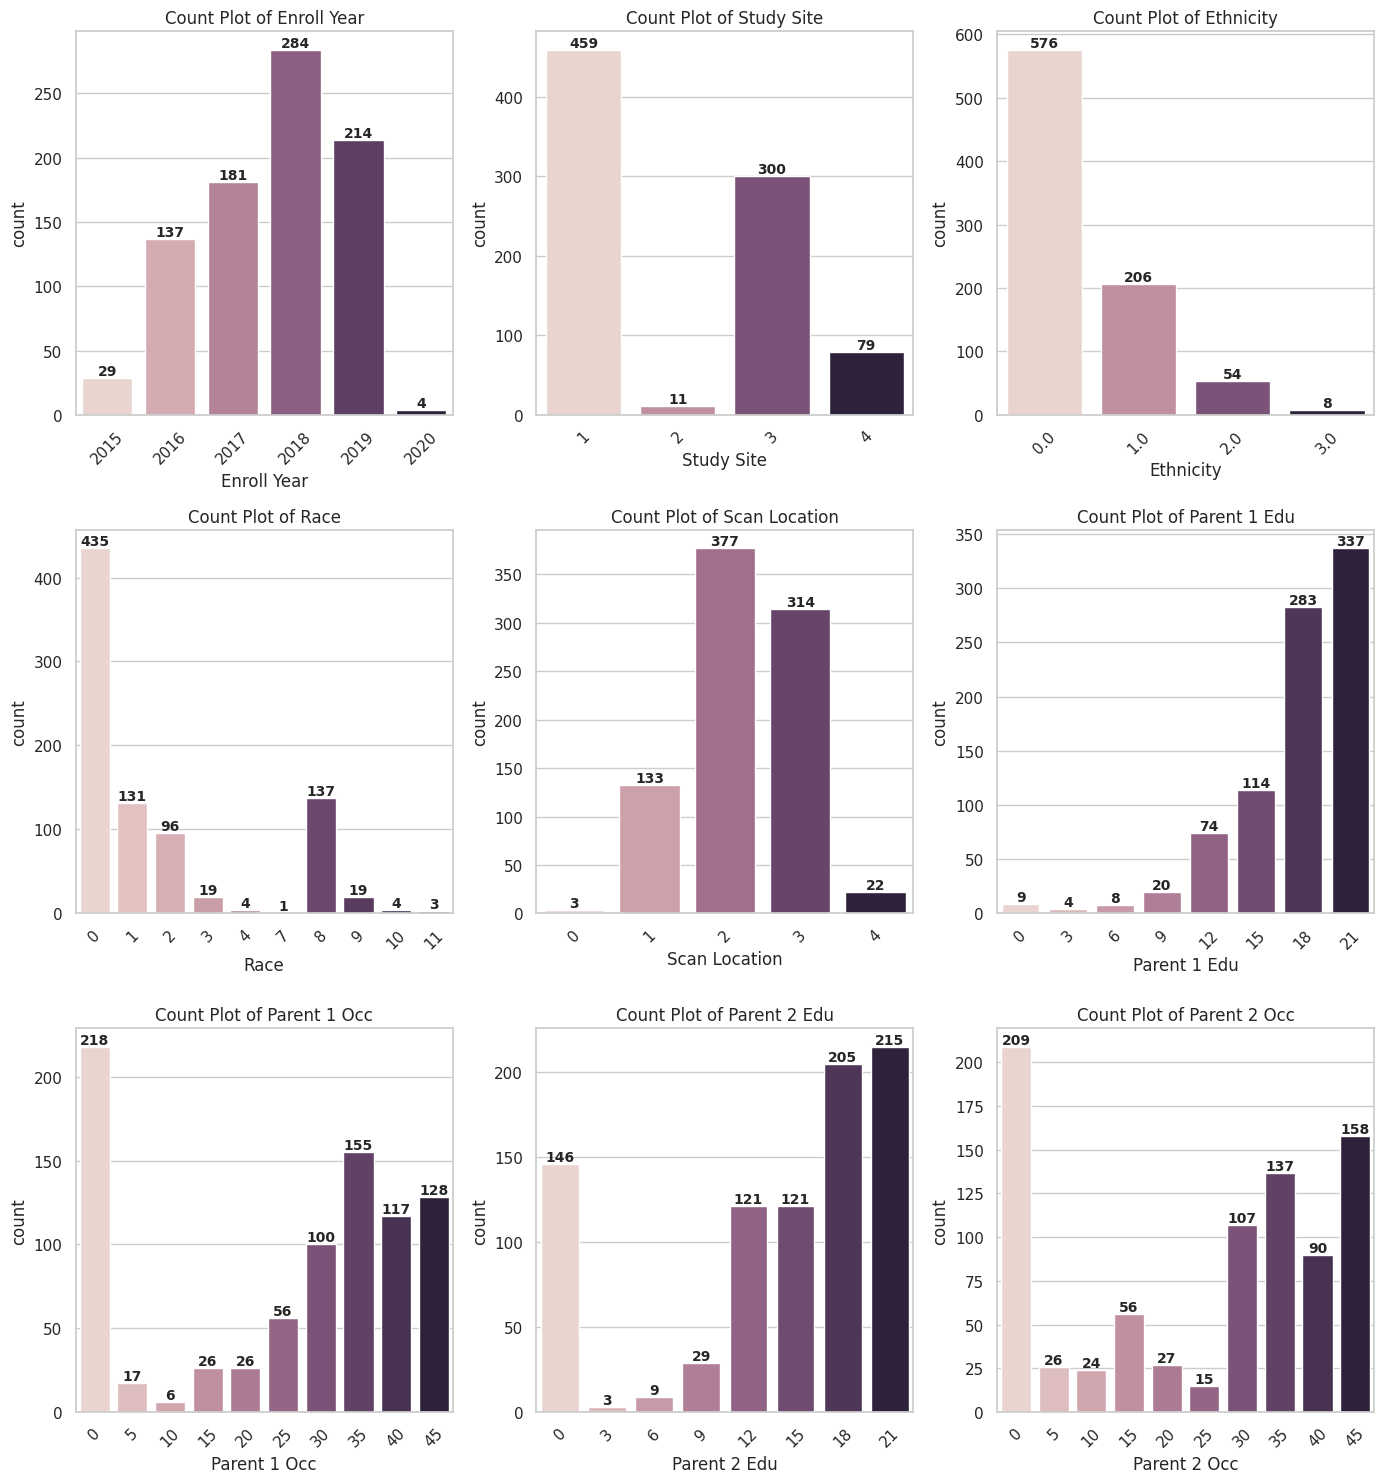

In [201]:
# Define figure size and layout based on the number of categorical columns
num_cols = len(plot_df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust grid dynamically

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(14, 5 * rows))
axes = axes.flatten()

# Iterate through all categorical columns and create a count plot
categorical_columns = plot_df.columns  # Assuming all columns are categorical

for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        ax = axes[i]
        plot = sns.countplot(data=plot_df, x=col, hue=col, legend=False, ax=ax)  # Fix applied
        ax.set_title(f'Count Plot of {col}')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-labels if needed

        # Add text labels on top of bars
        for p in plot.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove empty subplots if there are fewer than expected
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

Insight:

To visualize the distribution of categorical features in **`metadata_B`**, we plot histograms for each column. The figure size and layout are dynamically adjusted based on the number of categorical columns to ensure clarity and readability.

### **Visualization Strategy:**
- Each categorical column is plotted separately to observe its distribution.
- The figure layout is optimized to fit all histograms efficiently.
- **`PreInt_Demos_Fam_Child_Ethnicity`** and other categorical features are displayed to understand their spread.

This helps in identifying imbalances, dominant categories, and potential preprocessing needs.


## Mutual Information Correlation on Metadata B

Since the columns in **Metadata B** are categorical, we are performing a **mutual information correlation** analysis. This technique helps quantify the relationship between each feature and the target variable, providing valuable insights into feature relevance.  

By calculating mutual information, we can:
- Identify which features have the most predictive power.
- Understand the dependency between variables, helping in feature selection for modeling.
- Handle categorical data effectively, as mutual information is suitable for both continuous and discrete features.

This process enhances the analysis and ensures that only the most relevant features are used in the model.


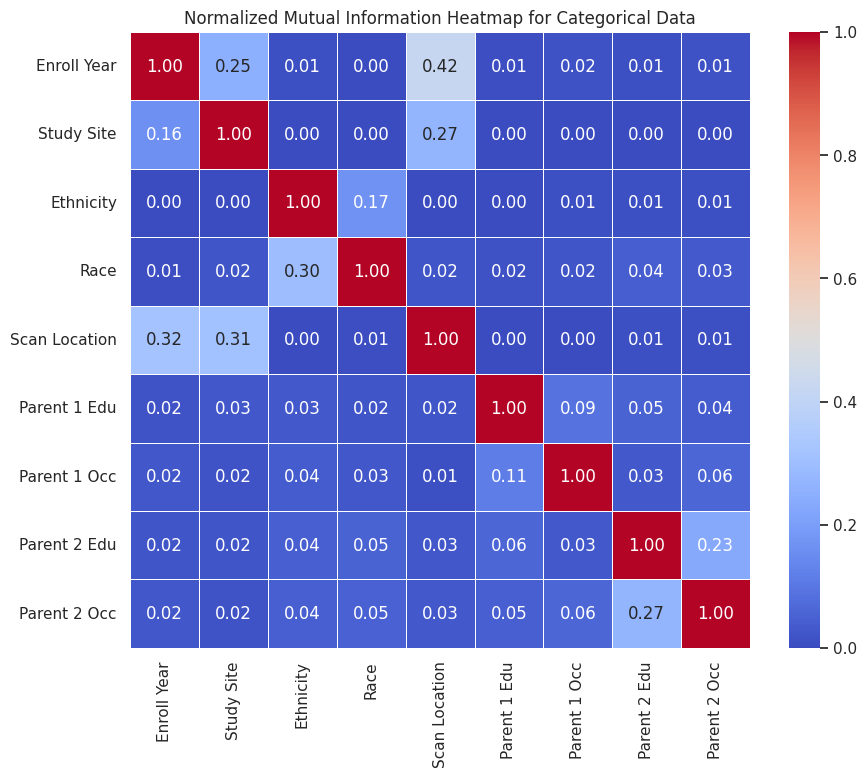

In [202]:
# Encode categorical variables
encoded_df = plot_df.copy()
for col in encoded_df.columns:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes  # Convert to numerical codes

# Compute Mutual Information
mi_matrix = pd.DataFrame(index=encoded_df.columns, columns=encoded_df.columns)

for col1 in encoded_df.columns:
    for col2 in encoded_df.columns:
        mi_matrix.loc[col1, col2] = mutual_info_classif(
            encoded_df[[col1]], encoded_df[col2], discrete_features=True
        )[0]

# Convert to float
mi_matrix = mi_matrix.astype(float)

# Normalize MI values to be between 0 and 1
scaler = MinMaxScaler()
mi_matrix[:] = scaler.fit_transform(mi_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Normalized Mutual Information Heatmap for Categorical Data")
plt.show()

Insight:

After performing mutual information analysis, we observed that no columns are strongly correlated to the extent that they should be dropped. Therefore, we will keep all columns as they are and proceed with the analysis.


## Verifying the Final Size of `metadata_B` (Training Set)

After completing all preprocessing steps on the training set, it's essential to validate that the size of **`metadata_B`** aligns with expectations.

### **Expected Shape of `metadata_B` (Training Set)**:
- **Rows**: **849** (70% of the original dataset)
- **Columns**: **10** (After preprocessing adjustments)

This verification ensures that **`metadata_B`** has been properly processed and is ready for integration into the model training pipeline.


In [203]:
metadata_B_copy.shape

(849, 10)

# Exploration and Preprocessing of Func

The exploration of **Func** has been initiated to understand its structure and content.  
This includes **data cleaning, preprocessing and detailed exploration** to identify missing values, inconsistencies, and patterns within the dataset.  
By performing these steps, the dataset is prepared for further analysis and modeling.  



## Applying PCA to Reduce Dimensionality in Func Data  

The **Func dataset** contains **19,901 columns**, making it extremely high-dimensional. Handling and visualizing such a large number of features is challenging, computationally expensive, and may lead to overfitting.  

### **Why Use PCA?**  
- **Reduces dimensionality** while retaining important variance.  
- **Improves computational efficiency**, making model training and analysis faster.  
- **Helps with visualization**, as working with thousands of features is impractical.  
- **Minimizes redundancy**, removing correlated or less informative features.  

Given the complexity of the dataset, **PCA (Principal Component Analysis)** is an effective way to simplify it while preserving meaningful information.


In [204]:
# Merge datasets (keeping participant_id for later merge)
merged_func_label = pd.merge(func_copy, label_copy, on='participant_id', how='inner')

# Separate participant_id from the rest of the data
participant_id = merged_func_label['participant_id']

# Clean the data (drop the identifier columns for now)
func_copy_cleaned = merged_func_label.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])

# Select 'ADHD_Outcome' and 'Sex_F' columns for later use (don't overwrite merged_func_label)
merged_func_label_selected = merged_func_label[['ADHD_Outcome', 'Sex_F']]

In [205]:
# Convert all values to numeric (force conversion)
func_copy_cleaned = func_copy_cleaned.apply(pd.to_numeric, errors='coerce')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(func_copy_cleaned)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Reattach participant_id to the scaled data for future reference
X_scaled_with_id = pd.DataFrame(X_scaled, columns=[f"PC{i+1}" for i in range(X_scaled.shape[1])])
X_scaled_with_id['participant_id'] = participant_id

## Determining the Optimal Number of PCA Components  

Since the **Func dataset** has **19,901 columns**, reducing its dimensionality with **PCA (Principal Component Analysis)** is necessary. However, selecting the right number of components is crucial to balancing **information retention** and **computational efficiency**.  

### **Using the Elbow Method**  
- The **elbow method** helps determine the ideal number of principal components by plotting the **explained variance** against the number of components.  
- The "elbow point" is where the curve starts to flatten, indicating that adding more components yields **diminishing returns** in variance explained.  
- This approach ensures that we retain **enough meaningful information** while significantly reducing the number of features.  

By applying the **elbow method**, we can identify the optimal number of components to retain for effective analysis and modeling.  


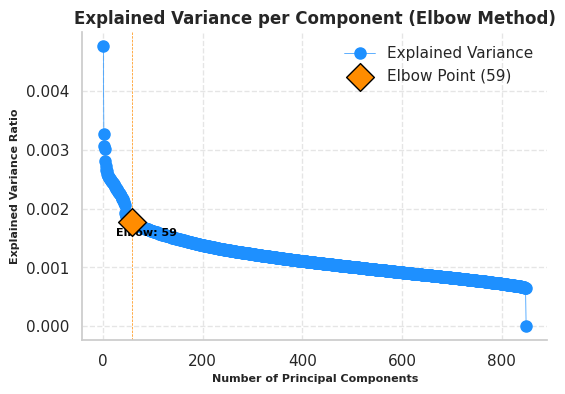

In [206]:
# Elbow detection
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow_point = knee_locator.knee

# Set a modern Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create the plot
plt.figure(figsize=(6, 4))

# Plot explained variance
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', markersize=8, linestyle='-', color='dodgerblue', label='Explained Variance', linewidth=0.5)

# Highlight the elbow point with a stylish marker
plt.scatter(elbow_point, explained_variance[elbow_point - 1], color='darkorange', s=200, edgecolors='black', marker='D', label=f'Elbow Point ({elbow_point})', zorder=5)

# Annotate the elbow point in a modern style
plt.annotate(f"Elbow: {elbow_point}",
             (elbow_point, explained_variance[elbow_point - 1]),
             textcoords="offset points", xytext=(10, -10),
             ha='center', fontsize=8, fontweight='bold', color='black')

# Add a vertical line at the elbow point
plt.axvline(x=elbow_point, color='darkorange', linestyle='--', linewidth=0.5)

# Title and labels with modern fonts (Seaborn defaults)
plt.xlabel('Number of Principal Components', fontsize=8, fontweight='bold')
plt.ylabel('Explained Variance Ratio', fontsize=8, fontweight='bold')
plt.title('Explained Variance per Component (Elbow Method)', fontsize=12, fontweight='bold')

# Remove unnecessary top and right borders (clean look)
sns.despine()

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', frameon=False)

# Show plot
plt.show()

**Insight :**  

From the graph, we can see that the **elbow point occurs at 59 principal components**.  
This suggests that selecting **59 PCA components** is an optimal balance, capturing most of the variance while significantly reducing the dimensionality from **19,901 features**.  
Using this reduced feature set will improve **computational efficiency** while retaining essential information for further analysis and modeling.  


## Checking PCA Components for 90% Variance Retention

Since PCA helps in dimensionality reduction while preserving essential information, we now check the **number of components needed to retain 90% of the variance**.  
This ensures that the most important features are retained while reducing redundancy.  

By comparing this with the **elbow method's** suggestion of **59 components**, we can decide the optimal balance between computational efficiency and information retention.  


In [207]:
# Find the number of components that explain 90% variance
cum_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cum_variance >= 0.90) + 1

print(f"Optimal number of components (90% variance): {optimal_components}")

Optimal number of components (90% variance): 714


## Choosing the Optimal Number of PCA Components  

Since the dataset initially contained **19,901 features**, applying **Principal Component Analysis (PCA)** is essential for reducing dimensionality, improving computational efficiency, and preventing overfitting.  

### **Comparison of Component Selection Methods**  

1. **95% Variance Retention (714 components)**  
   - Retaining **90% of the variance** ensures that most of the original information is preserved.  
   - While this reduces the feature space from 19,901 to 778, it still results in a **relatively high** number of dimensions.  
   - More features increase computational cost but minimize information loss.  

2. **Elbow Method (59 components)**  
   - The **elbow method** identifies the point where adding more components leads to **diminishing returns** in explained variance.  
   - **59 components** offer an optimal trade-off, maintaining most of the useful variance while drastically reducing dimensionality.  
   - This results in **faster model training, lower memory usage, and reduced risk of overfitting**.  

### **Choosing the Optimal Number of Components**  

Since **778 components** is still a large number, starting with **59 components** from the **elbow method** would be a more efficient approach.  
This allows for a significant reduction in dimensionality while preserving essential variance. Further analysis can determine if increasing the number of components improves performance.


In [208]:
# Set a random seed for reproducibility
random_state = 42

# Apply PCA with 59 components
pca = PCA(n_components=59, svd_solver='randomized', random_state=random_state)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for 59 components
explained_variance = pca.explained_variance_ratio_

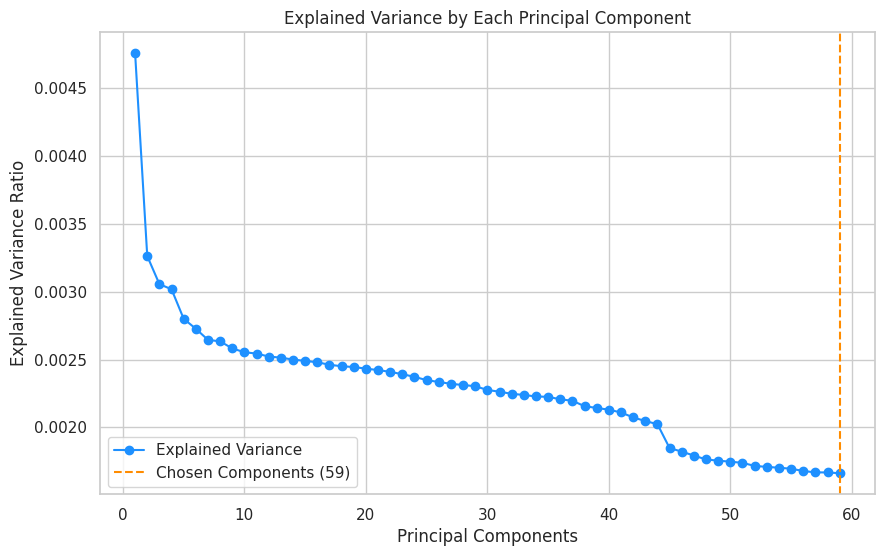

In [209]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='dodgerblue', label='Explained Variance')
plt.axvline(x=59, color='darkorange', linestyle='--', label='Chosen Components (59)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.legend()
plt.grid(True)
plt.show()

## ANOVA Analysis of PCA Components for Gender and ADHD

To understand how the PCA components relate to **gender** (male vs. female) and **ADHD** (yes vs. no), we will perform the following steps:

1. **Add Label Columns to PCA Results**  
   First, we merge the **PCA components** with the **label columns** (gender and ADHD) to correlate the principal components with the target labels.

2. **Statistical Analysis Using ANOVA**  
   We will apply **ANOVA** to check for significant differences in each principal component (PC) between groups (gender and ADHD).  
   - **Why ANOVA?**: ANOVA helps determine if the mean of a component differs significantly between groups. A p-value < 0.05 suggests a statistically significant difference.
   
   The output will include p-values for each principal component, indicating whether the component's variance differs significantly between the groups.


In [210]:
# Create a DataFrame for PCA components and include participant_id
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(59)])

# Reattach the 'participant_id' to the PCA DataFrame
pca_df['participant_id'] = participant_id

# Add 'ADHD_Outcome' and 'Sex_F' labels to PCA components
pca_df['ADHD_Outcome'] = merged_func_label['ADHD_Outcome']
pca_df['Sex_F'] = merged_func_label['Sex_F']

# Create a combined column for both 'ADHD_Outcome' and 'Sex_F'
pca_df['ADHD_Sex_Interaction'] = pca_df['ADHD_Outcome'].astype(str) + '_' + pca_df['Sex_F'].astype(str)

In [211]:
# Function to perform ANOVA for each component and categorical variable
def anova_by_component(df, label_col):
    p_values = {}
    for col in df.columns[:-2]:  # Exclude the label columns
        group_1 = df[df[label_col] == df[label_col].unique()[0]][col]
        group_2 = df[df[label_col] == df[label_col].unique()[1]][col]
        f_stat, p_val = stats.f_oneway(group_1, group_2)
        p_values[col] = p_val
    return p_values

In [212]:
# Function to perform ANOVA for the combined factor
def anova_by_combined_factor(df, label_col):
    p_values = {}
    for col in df.columns[:-3]:  # Exclude the label columns and the combined factor column
        groups = [df[df[label_col] == group][col] for group in df[label_col].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        p_values[col] = p_val
    return p_values

In [213]:
# Perform ANOVA for 'ADHD_Outcome' and 'Sex_F'
ADHD_p_values = anova_by_component(pca_df.drop(columns=['participant_id']), 'ADHD_Outcome')

gender_p_values = anova_by_component(pca_df.drop(columns=['participant_id']), 'Sex_F')

# Perform ANOVA for the combined factor of 'ADHD_Outcome' and 'Sex_F'
combined_p_values = anova_by_combined_factor(pca_df.drop(columns=['participant_id']), 'ADHD_Sex_Interaction')

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning:

Each of the input arrays is constant; the F statistic is not defined or infinite



### Visual Representation of ANOVA Analysis for PCA Components (Gender and ADHD)

The ANOVA analysis tests the hypothesis of whether there are significant differences between the groups (e.g., male vs. female for gender and ADHD vs. non-ADHD for ADHD) across the PCA components.

**Key Steps in the Process:**
1. **ANOVA Test**: For each PCA component, an ANOVA test is performed to compare the means of the PCA component values between the different groups (e.g., gender: male vs. female; ADHD: ADHD vs. non-ADHD).
2. **p-values**: The p-values from the ANOVA test indicate whether the differences between groups are statistically significant. A low p-value (typically < 0.05) suggests that there is a significant difference between groups for that component.
3. **Visualization**: The p-values from the ANOVA tests for each PCA component are plotted in a bar chart. This allows for a visual comparison of the significance of each component in relation to gender and ADHD.

**Expected Insights:**
- The bar plot will show which PCA components are most significant for distinguishing between groups.
- Components with **p-values below 0.05** will suggest that these components vary significantly between groups (either gender or ADHD or combined).
- Components with **p-values above 0.05** indicate less significance for differentiating between the groups and may not be as useful for classification.

This visualization helps in understanding which PCA components have a strong association with gender and ADHD and can guide further analysis and feature selection.


In [214]:
# Combine all p-values into a DataFrame for plotting
anova_results = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(59)],
    'ADHD_Outcome': [ADHD_p_values.get(f'PC{i+1}', float('nan')) for i in range(59)],
    'Sex_F': [gender_p_values.get(f'PC{i+1}', float('nan')) for i in range(59)],
    'ADHD_Sex_Interaction': [combined_p_values.get(f'PC{i+1}', float('nan')) for i in range(59)]
})

In [215]:
def plot_anova_results(anova_results, title):
    # Melt the data for plotting
    anova_results_melted = pd.melt(anova_results, id_vars=["PC"], value_vars=["ADHD_Outcome", "Sex_F", "ADHD_Sex_Interaction"])

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=anova_results_melted, x="PC", y="value", hue="variable", palette="viridis")

    # Customize the plot
    plt.xticks(rotation=90)
    plt.ylabel('ANOVA p-values')
    plt.title(title)

    # Show the plot
    plt.show()

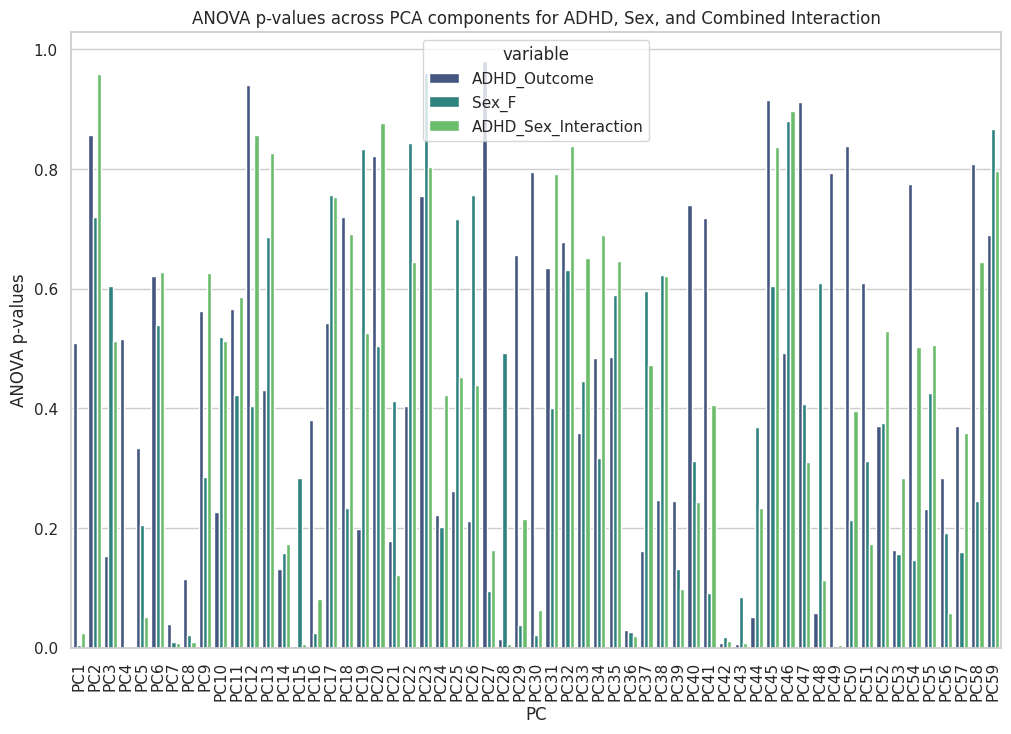

In [216]:
# Plotting
plot_anova_results(anova_results, 'ANOVA p-values across PCA components for ADHD, Sex, and Combined Interaction')

### Visual Representation of ANOVA Analysis for PCA Components (Gender and ADHD)

The ANOVA analysis tests the hypothesis of whether there are significant differences between the groups (e.g., male vs. female for gender and ADHD vs. non-ADHD for ADHD) across the PCA components.

**Key Steps in the Process:**
1. **ANOVA Test**: For each PCA component, an ANOVA test is performed to compare the means of the PCA component values between the different groups (e.g., gender: male vs. female; ADHD: ADHD vs. non-ADHD).
2. **p-values**: The p-values from the ANOVA test indicate whether the differences between groups are statistically significant. A low p-value (typically < 0.05) suggests that there is a significant difference between groups for that component.
3. **Threshold**: In this analysis, a threshold of **0.45** is set for the p-values. This threshold helps in reducing the number of PCA components with insignificant p-values while retaining those that show meaningful variation between groups.
4. **Visualization**: The p-values from the ANOVA tests for each PCA component are plotted in a bar chart. This allows for a visual comparison of the significance of each component in relation to gender and ADHD.

**Expected Insights:**
- The bar plot will show which PCA components are most significant for distinguishing between groups.
- By applying a **threshold of 0.45**, we can eliminate components with higher p-values, focusing only on those with more significant differences between groups.
- Components with **p-values below 0.45** suggest that these components vary significantly between groups (either gender or ADHD), while components with **p-values above 0.45** will be considered less important.
- This helps in reducing the number of PCA components considered for further analysis, simplifying the model while retaining the most informative features.

This approach balances the need to reduce the dimensionality of the dataset with retaining the key features that distinguish between gender and ADHD.


In [217]:
# Set the threshold
threshold = 0.45

# Identify valid PCA components (any of the p-values is <= threshold)
valid_pcs = anova_results[
    (anova_results['ADHD_Outcome'] <= threshold) |
    (anova_results['Sex_F'] <= threshold) |
    (anova_results['ADHD_Sex_Interaction'] <= threshold)
].index

# Identify invalid PCA components (those where all p-values are > threshold)
invalid_pcs = anova_results[
    (anova_results['ADHD_Outcome'] > threshold) &
    (anova_results['Sex_F'] > threshold) &
    (anova_results['ADHD_Sex_Interaction'] > threshold)
].index

# Filter valid and invalid PCA components
valid_pca_results = anova_results.iloc[valid_pcs]
invalid_pca_results = anova_results.iloc[invalid_pcs]

# Reindex the 'PC' column to start from 1 again for valid and invalid results
valid_pca_results['PC'] = [f'PC{i+1}' for i in range(len(valid_pca_results))]
invalid_pca_results['PC'] = [f'PC{i+1}' for i in range(len(invalid_pca_results))]

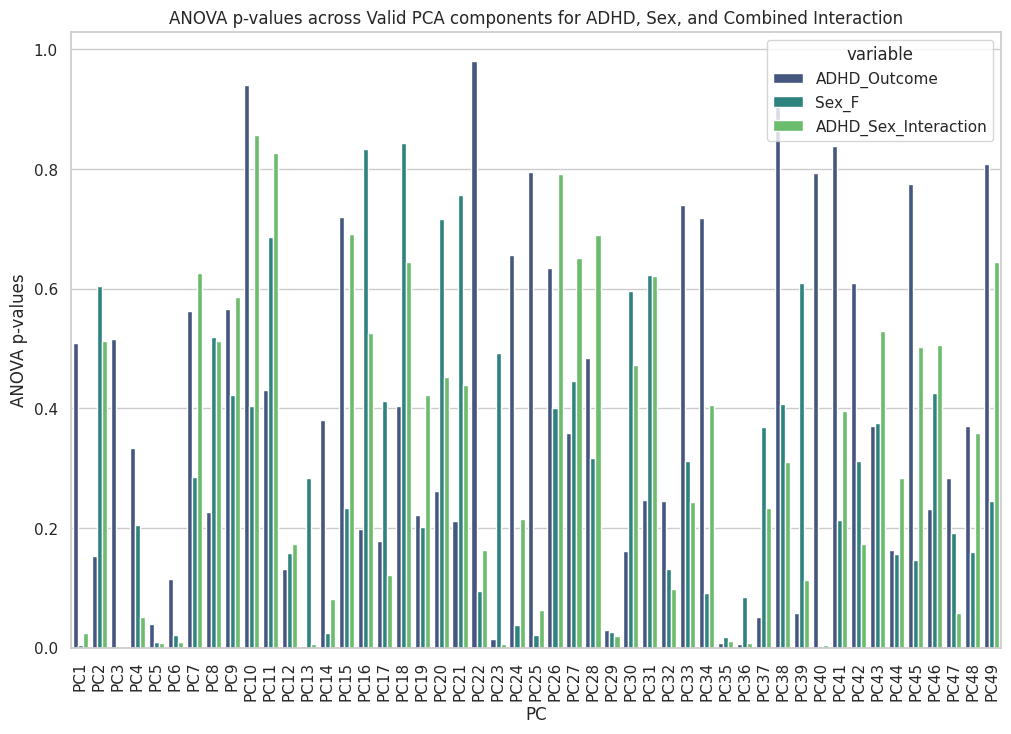

In [218]:
# Plotting for valid PCA components (those that meet the threshold condition for any factor)
plot_anova_results(valid_pca_results, 'ANOVA p-values across Valid PCA components for ADHD, Sex, and Combined Interaction')

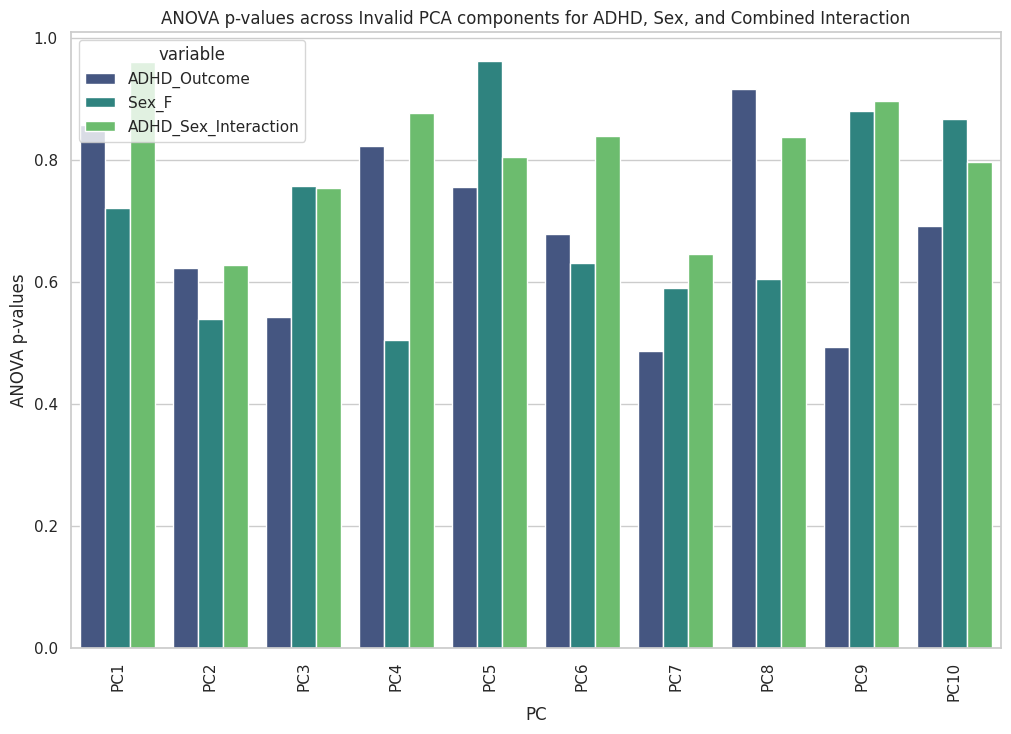

In [219]:
# Plotting for invalid PCA components (those where all p-values are > threshold)
plot_anova_results(invalid_pca_results, 'ANOVA p-values across Invalid PCA components for ADHD, Sex, and Combined Interaction')

## Updating the func_copy Dataset Based on ANOVA p-value Threshold

After performing the ANOVA analysis for each PCA component, we set a threshold of **0.45** for the p-values. This threshold was chosen to ensure that we only retain PCA components that show meaningful differences between groups (e.g., gender or ADHD) while reducing the number of components with insignificant p-values.

**What This Means for the Dataset:**
- **Threshold Application**: Components with p-values greater than **0.45** are considered not significantly different between groups and will be discarded from further analysis.
- **Keeping Important Components**: PCA components with p-values **below 0.45** are retained, as they represent components that vary significantly between gender or ADHD groups.
  
**Updating the `func_copy` Dataset:**
- The original `func_copy` dataset contains all the PCA components.
- After applying the p-value threshold, we update the `func_copy` dataset by keeping only those components whose p-values are less than **0.45**.
  
This step reduces the number of features in the dataset, simplifying the model and focusing on the most significant components. By retaining only the relevant components, we improve the model’s ability to capture meaningful patterns and relationships while reducing noise and unnecessary complexity.


In [220]:
# Step 1: Sort pca_df by 'participant_id' to ensure correct order
pca_df_sorted = pca_df.sort_values(by='participant_id').reset_index(drop=True)

# Step 2: Select only the valid PCA components
valid_pca_columns = valid_pca_results['PC'].values  # Get valid PCA component names
valid_pca_df = pca_df_sorted[valid_pca_columns].copy()  # Extract valid PCA components

# Step 3: Add 'participant_id' to valid_pca_df from sorted pca_df
valid_pca_df['participant_id'] = pca_df_sorted['participant_id']

# Step 4: Sort func_copy by 'participant_id' to align with valid_pca_df
func_copy_sorted = func_copy.sort_values(by='participant_id').reset_index(drop=True)

# Step 5: Perform the merge on 'participant_id' and keep only PCA columns in the result
func_copy = pd.merge(func_copy_sorted[['participant_id']], valid_pca_df, on='participant_id', how='inner')

In [221]:
func_copy.head()

participant_id       PC1       PC2       PC3        PC4       PC5       PC6  \
0   00aIpNTbG5uh  0.478632 -4.939432 -3.226149   1.009761 -3.633545 -3.804756   
1   00fV0OyyoLfw -1.069377 -7.559515 -2.760946  -1.720175 -3.138752 -0.383579   
2   04X1eiS79T4B -3.550028  8.642864 -0.459719   6.828577 -3.727561  1.165518   
3   05ocQutkURd6  1.405892 -6.848363  1.858334  -0.548639 -4.017597 -3.750167   
4   06YUNBA9ZRLq -1.797170  5.009210  1.392640  10.637761  2.895237 -0.133547   

        PC7       PC8       PC9  ...      PC40      PC41      PC42      PC43  \
0 -1.818055  0.523446  2.830536  ... -2.296269  0.200066 -3.357589 -1.246899   
1  1.761794 -0.394587  2.376034  ...  1.357181  0.664018  2.729269 -1.330304   
2  4.259749  0.991355  4.250744  ... -0.734634  2.217386 -0.563894  0.219718   
3 -0.958164  2.773714  0.924617  ... -0.326292  1.992445  5.037232 -1.377503   
4 -1.104304 -2.123682 -2.076251  ...  1.889050 -1.370824  2.526185 -0.673202   

        PC44      PC45      PC46      PC47      PC48      PC49  
0   2.601389 -1.520322  3.714459  2.963587  0.344631 -2.684118  
1   3.021900 -3.680520  2.480003 -2.843145  2.065210  1.323474  
2   4.586555 -6.289078  4.891083 -4.643589 -6.522771  2.400560  
3  11.124604 -2.036605  0.115162 -5.351182  0.356218 -3.284787  
4   0.521462  0.619392 -4.281353  2.274081  4.465837  0.490437  

[5 rows x 50 columns]

## Verifying the Final Size of `func` (Training Set)

After applying PCA, we initially retained **59 components**. However, after applying a threshold based on p-value filtering, **10 components** were dropped.

### **Expected Shape of `func` (Training Set)**:
- **Rows**: **849** (corresponding to 70% of the original dataset)
- **Columns**: **50** (49 PCA components + 1 participant_id)

This confirms that the preprocessing and feature selection steps were correctly applied, ensuring the dataset is structured properly for model training.


In [222]:
func_copy.shape

(849, 50)

# Exploration and Preprocessing of Label

The exploration of **label** has been initiated to understand its structure and content.  
This includes **data cleaning, preprocessing and detailed exploration** to identify missing values, inconsistencies, and patterns within the dataset.  
By performing these steps, the dataset is prepared for further analysis and modeling.  



## Visualizing the Distribution of `label` (Sex and ADHD)

To understand the distribution of the `label` data, we can plot a bar plot for both **Sex** and **ADHD**. This will give us insights into the class balance in the dataset and help identify any potential imbalances between the categories.

#### Key observations:
- **Sex**: The distribution of male and female participants.
- **ADHD**: The count of participants diagnosed with ADHD compared to non-ADHD.

This visualization helps assess the balance between different classes and is important for further analysis and model training.



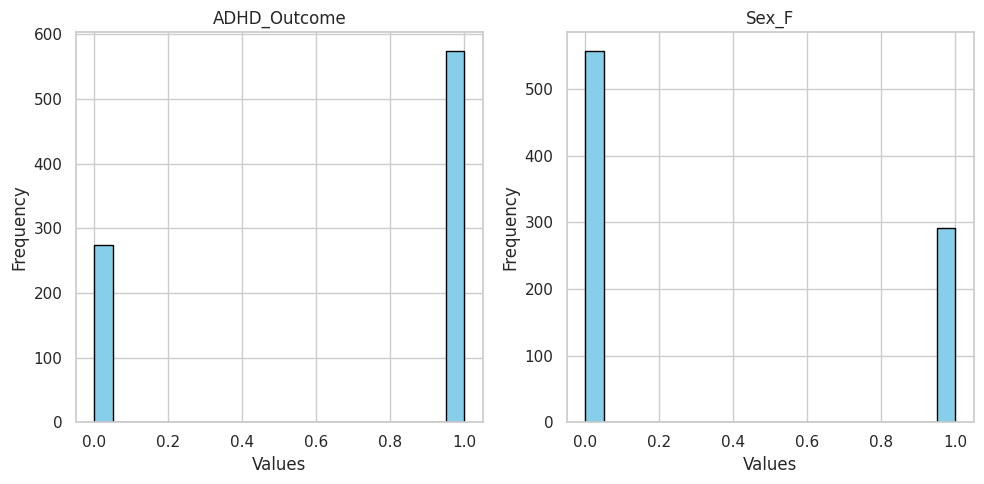

In [223]:
# Step 1: Drop participant_id column if it's present
label_copy_no_id = label_copy.drop(columns=['participant_id'], errors='ignore')

# Step 2: Set up the number of subplots (one for each column in label_copy)
num_columns = label_copy_no_id.shape[1]

# Step 3: Create subplots
fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 5, 5))

# Step 4: Plot histograms for each column
for i, column in enumerate(label_copy_no_id.columns):
    axes[i].hist(label_copy_no_id[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Step 5: Adjust layout for better readability
plt.tight_layout()
plt.show()

Insight:

After visualizing the **label dataset**, we observed the following:

1. **Gender Distribution**: There are more **male** participants compared to female participants in the dataset. This could indicate an imbalance in the gender distribution, which might impact the model's performance and generalizability. Addressing class imbalance may be considered during model training, such as using class weights or resampling techniques.

2. **ADHD Distribution**: The dataset also shows that **ADHD** cases are more prevalent than non-ADHD cases. This could lead to potential bias in model predictions if the distribution is too skewed. We may need to account for this imbalance through techniques like oversampling the minority class or using specific metrics that handle class imbalance (e.g., ROC AUC, F1-score) during evaluation.

These insights are essential to understanding the dataset and planning appropriate preprocessing or model strategies to ensure balanced predictions.


## Creating a Contingency Table of `Sex` and `ADHD_Outcome`

To better understand the relationship between **Sex** and **ADHD_Outcome**, we create a contingency table. This will show how these two variables are distributed across the dataset.

#### Heatmap Visualization:
A heatmap will provide a clear overview of the relationship between **Sex** and **ADHD_Outcome**, making it easier to visualize the frequency of combinations of the two variables. This will help in understanding any potential patterns or imbalances between the groups.

This step is important for ensuring that the data is balanced and to evaluate if there are any noticeable differences between **Sex** and **ADHD** outcome.



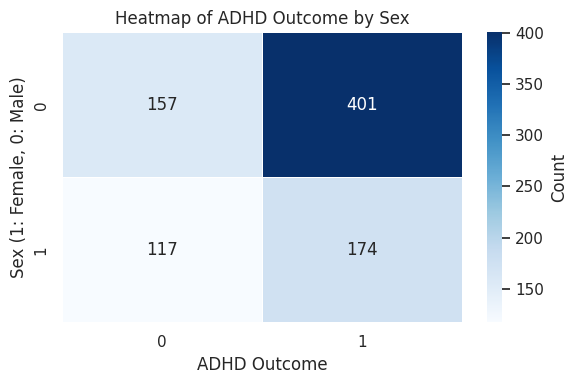

In [224]:
# Create a contingency table of Sex and ADHD_Outcome
contingency_table = pd.crosstab(label_copy['Sex_F'], label_copy['ADHD_Outcome'])

# Create a heatmap to visualize the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'}, linewidths=0.5)

# Set chart title and labels
plt.title('Heatmap of ADHD Outcome by Sex')
plt.xlabel('ADHD Outcome')
plt.ylabel('Sex (1: Female, 0: Male)')

# Show the plot
plt.tight_layout()
plt.show()

Insight:

After visualizing the heatmap, we can observe the distribution of **Sex** and **ADHD_Outcome** in the dataset:

- **Male**:  
  - ADHD: 401  
  - Non-ADHD: 157  

- **Female**:  
  - ADHD: 174  
  - Non-ADHD: 117  

This distribution shows that **males** are more represented in the ADHD category, while **females** show a more balanced distribution between ADHD and non-ADHD outcomes. This insight can help in understanding potential gender-related patterns in ADHD prevalence within the dataset.


#Updating Preprocessed Datasets to the Training Dataset

Once the preprocessing steps (such as handling outliers, missing values, and applying PCA or ANOVA) have been completed, we will integrate the updated datasets into the training dataset for model development. The preprocessed datasets include the cleaned and transformed versions of **metadata_A**, **metadata_B**, **func**, and **label**.

#### Steps for Updating:
1. **Preprocessed `metadata_A`**: After handling missing values and updating specific columns (e.g., `MRI_Track_Age_at_Scan`), we will add it to the training dataset.
2. **Preprocessed `metadata_B`**: This dataset is processed to handle categorical columns and deal with discrepancies, like the "0" values for unknown categories. The cleaned version will also be added.
3. **Preprocessed `func`**: The functional dataset will be updated with the relevant PCA components after filtering by ANOVA p-value thresholds.
4. **Preprocessed `label`**: The target variable dataset will remain unchanged but will be aligned with the processed feature datasets.

#### Final Integration:
After preprocessing, we merge these datasets into a single training set, ensuring that the **participant_id** serves as the key for alignment between datasets. The final training dataset will be used for model training and evaluation.

This process results in an updated, cleaner training dataset that reflects the necessary preprocessing steps, making it ready for machine learning algorithms.


In [225]:
# Copy the preprocessed datasets (if necessary)
preprocessed_metadata_A = metadata_A_copy
preprocessed_metadata_B = metadata_B_copy
preprocessed_func = func_copy

# Merge the metadata_A and metadata_B datasets on 'participant_id'
# This will combine the demographic information from both datasets
X_train_updated = pd.merge(metadata_A_copy, metadata_B_copy, on="participant_id", how="inner")

# Merge the resulting dataset from the previous step with the functional data (func_copy) on 'participant_id'
# This will add the functional connectivity features to the dataset
X_train_updated = pd.merge(X_train_updated, func_copy, on="participant_id", how="inner")

# Assign the final merged dataset to X_train, which now includes metadata and functional features
X_train = X_train_updated

## Verifying the Final Size of `X_train` (Training Set)

After merging all preprocessed datasets (**metadata_A**, **metadata_B**, and **func**), we need to confirm that the final shape of **`X_train`** aligns with our expectations.

### **Breakdown of `X_train` Components**:
1. **metadata_A** → **17 columns**
2. **metadata_B** → **8 columns**
3. **func (PCA components)** → **50 columns**
4. **Total columns** = **17 + 8 + 50 = 75**

### **Final Shape of `X_train`**:
- **Rows**: **849** (corresponding to 70% of the original dataset)
- **Columns**: **75** (combined from metadata_A, metadata_B, and func)

This confirms that all datasets have been correctly merged while maintaining the expected dimensions, ensuring a proper feature set for model training.


In [226]:
X_train.shape

(849, 75)

#Preprocessing of the Test Dataset

Now that the preprocessing steps have been applied to the training dataset, we need to ensure the same preprocessing is applied to the **test dataset**. This ensures that the test data is transformed in the same way as the training data, maintaining consistency for model evaluation.

### Steps to Update the Test Dataset:

1. **PCA Transformation**: We will apply the PCA transformation using the same **59 components** and **threshold** applied to the training dataset.
2. **Matching Columns**: Any columns that were dropped or transformed during preprocessing on the training data (e.g., removing features based on the p-value threshold) will be similarly handled in the test dataset.
3. **Feature Alignment**: The test dataset will be aligned with the training dataset by ensuring it contains the same set of features. Any mismatched columns (e.g., missing columns) will be added or dropped based on the training dataset's features.

By applying the same preprocessing to the test dataset, we ensure that the model evaluates the test data under the same conditions as the training data, providing an accurate and fair assessment of model performance.


## Creating Separate DataFrames for Specific Columns in the Testing Dataset

New DataFrames (**metadata_A_test**, **metadata_B_test**, **func_test**, **label_test**) are created by filtering the columns from **X_test** based on specific prefixes like `'metadata_A_'`, `'metadata_B_'`, etc.  

This process involves selecting columns whose names start with a particular string and saving them into new variables. By doing this, we can isolate different parts of the dataset, such as metadata or functional data, and analyze them separately while ensuring consistency with the training dataset structure.


In [227]:
# Create a new dataframe with only the 'metadata_A' columns
X_test_metadata_A = X_test[metadata_A_column_names]
X_test_metadata_A.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
382   M6malGe8P7Ic          80.00                    14               5   
787   XBAesR0BxzjQ          86.67                     5               3   
43    PtxdLLjvEhIS         100.00                    14               3   
155   OGitd7RL4GlH        -100.00                     6               4   
493   X6mFs3EnxuJt          73.34                    14               3   

     APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
382              19               43               16              13   
787              14               38               19              15   
43               13               47               16              17   
155              12               45               17              18   
493              12               42               17              28   

     APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
382              23                         5                          18   
787              29                         1                           6   
43               28                         2                          16   
155              26                         1                          17   
493              23                         1                           7   

     SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
382                           4                     12   
787                           0                      6   
43                            3                     12   
155                           4                      9   
493                           4                      2   

     SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
382                          1                      7                      6   
787                          2                      5                      0   
43                           7                     10                      4   
155                          8                      8                      8   
493                          4                      1                      5   

     SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
382                      2                  7                    NaN  
787                      0                  9               9.646589  
43                       1                 10                    NaN  
155                      4                  9              16.675222  
493                      1                 10              16.579283

In [228]:
X_test_metadata_A.shape

(364, 19)

Insight:

Since the **metadata_A** dataset originally has a shape of **1213 x 19**, the copied version (**X_test_metadata_A**) also has a shape of **1213 x 19**. After splitting into training and testing sets, the training data has **364 rows**, so the copied version for the training set will maintain the same structure with **364 rows** and **19 columns**.


In [229]:
# Create a new dataframe with only the 'metadata_B' columns
X_test_metadata_B = X_test[metadata_B_column_names]
X_test_metadata_B.head()

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
382   M6malGe8P7Ic                     2018                       3   
787   XBAesR0BxzjQ                     2018                       3   
43    PtxdLLjvEhIS                     2017                       1   
155   OGitd7RL4GlH                     2018                       3   
493   X6mFs3EnxuJt                     2019                       3   

     PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
382                               2.0                            0   
787                               0.0                            0   
43                                2.0                            0   
155                               2.0                            0   
493                               1.0                            2   

     MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
382                        3                      18                      35   
787                        2                      21                      45   
43                         2                      21                      40   
155                        3                      21                       0   
493                        3                      18                      30   

     Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
382                      18                      25  
787                      21                      45  
43                       18                      30  
155                      21                      45  
493                      18                      30

In [230]:
X_test_metadata_B.shape

(364, 10)

Insight:

Since the **metadata_B** dataset originally has a shape of **1213 x 10**, the copied version (**X_test_metadata_B**) also has a shape of **1213 x 10**. After splitting into training and testing sets, the training data has **364 rows**, so the copied version for the training set will maintain the same structure with **364 rows** and **10 columns**.


In [231]:
# Create a new dataframe with only the 'label' columns
y_test_label = y_test[label_column_names]
y_test_label.head()

participant_id  ADHD_Outcome  Sex_F
382   M6malGe8P7Ic             1      1
787   XBAesR0BxzjQ             1      0
43    PtxdLLjvEhIS             1      0
155   OGitd7RL4GlH             1      0
493   X6mFs3EnxuJt             1      1

In [232]:
y_test_label.shape

(364, 3)

Insight:

Since the **label** dataset originally has a shape of **1213 x 3**, the copied version (**y_test_label**) also has a shape of **1213 x 3**. After splitting into training and testing sets, the training data has **364 rows**, so the copied version for the training set will maintain the same structure with **364 rows** and **3 columns**.

In [233]:
# Create a new dataframe with only the 'func' columns
X_test_func = X_test[func_column_names]
X_test_func.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
382   M6malGe8P7Ic          0.174787          0.113431          0.086208   
787   XBAesR0BxzjQ          0.074737          0.087584          0.055679   
43    PtxdLLjvEhIS          0.128332          0.096450          0.089495   
155   OGitd7RL4GlH          0.029862          0.286800          0.116727   
493   X6mFs3EnxuJt          0.085795          0.147478          0.001708   

     0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
382          0.008120          0.028366          0.103857          0.066749   
787          0.047464          0.130256          0.040468          0.040192   
43           0.047003          0.066199          0.091555          0.071540   
155         -0.021607         -0.013594          0.134679          0.069509   
493          0.033836          0.124363          0.085339          0.082358   

     0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
382         -0.031590          0.019061  ...              0.025051   
787         -0.056944          0.094343  ...              0.052201   
43           0.004657         -0.005045  ...              0.014734   
155         -0.081315         -0.052204  ...              0.031544   
493          0.010276          0.003094  ...             -0.003165   

     195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
382             -0.024891              0.035198              0.048937   
787             -0.033053             -0.028473              0.061033   
43               0.012947              0.003754              0.028053   
155             -0.028274              0.052257             -0.038059   
493              0.047280              0.039229              0.045420   

     196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
382              0.125296              0.019569              0.039055   
787              0.132385              0.037340              0.068514   
43               0.031316              0.008514              0.057461   
155              0.121919              0.018135              0.059151   
493              0.084834              0.058669              0.013384   

     197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
382              0.111842              0.048536              0.068650  
787              0.092271              0.090665              0.172602  
43               0.117348              0.069513              0.176219  
155              0.057965              0.095701              0.102124  
493              0.134071              0.204531              0.191961  

[5 rows x 19901 columns]

In [234]:
X_test_func.shape

(364, 19901)

Insight:

Since the **func** dataset originally has a shape of **1213 x 19901**, the copied version (**X_test_func**) also has a shape of **1213 x 19901**. After splitting into training and testing sets, the training data has **364 rows**, so the copied version for the training set will maintain the same structure with **364 rows** and **19901 columns**.


## Applying Preprocessing to `metadata_A_test`

To maintain consistency between the training and testing datasets, we apply the same preprocessing steps to **metadata_A_test** as we did for **metadata_A_train**. This ensures that the test dataset undergoes the same transformations, preventing data leakage and maintaining model integrity.

### **Preprocessing Steps Applied:**
1. **Handling Missing Values:**  
   - Missing values in specific columns are imputed using the same strategy as in the training dataset.

2. **Changing Data Types:**  
   - Data types are adjusted to match those used in **metadata_A_train**, ensuring consistency across datasets.

3. **Outlier Handling:**  
   - Any modifications to outliers in **metadata_A_train** are mirrored in **metadata_A_test** to maintain uniformity.

4. **Dropping Highly Correlated Features:**  
   - Features with high correlation, as identified in the training dataset, are also removed from the test dataset.

By ensuring identical preprocessing, we prevent discrepancies between training and testing data, allowing the model to make reliable predictions.


### Handling Lower Outliers

For **lower outliers** in `metadata_A_test`, values below a certain threshold are considered erroneous and replaced with `NaN`. This aligns with the handling in the training dataset, ensuring consistency across both datasets.

The rows with `NaN` values will be addressed with imputation or other techniques, ensuring that the data remains clean and ready for model input.


In [235]:
# Replace matching values with NaN
X_test_metadata_A.loc[
    X_test_metadata_A["MRI_Track_Age_at_Scan"].isin(lower_outliers_sorted["MRI_Track_Age_at_Scan"]),
    "MRI_Track_Age_at_Scan"
] = np.nan

# Display the updated DataFrame
X_test_metadata_A.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
382   M6malGe8P7Ic          80.00                    14               5   
787   XBAesR0BxzjQ          86.67                     5               3   
43    PtxdLLjvEhIS         100.00                    14               3   
155   OGitd7RL4GlH        -100.00                     6               4   
493   X6mFs3EnxuJt          73.34                    14               3   

     APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
382              19               43               16              13   
787              14               38               19              15   
43               13               47               16              17   
155              12               45               17              18   
493              12               42               17              28   

     APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
382              23                         5                          18   
787              29                         1                           6   
43               28                         2                          16   
155              26                         1                          17   
493              23                         1                           7   

     SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
382                           4                     12   
787                           0                      6   
43                            3                     12   
155                           4                      9   
493                           4                      2   

     SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
382                          1                      7                      6   
787                          2                      5                      0   
43                           7                     10                      4   
155                          8                      8                      8   
493                          4                      1                      5   

     SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
382                      2                  7                    NaN  
787                      0                  9               9.646589  
43                       1                 10                    NaN  
155                      4                  9              16.675222  
493                      1                 10              16.579283

In [236]:
X_test_metadata_A.shape

(364, 19)

### Applying Random Forest Imputation to Test Data

The Random Forest model, which was trained on the **training dataset** to impute missing values, will now be applied to the **test dataset** to detect and fill any missing values.

#### **Steps:**
1. **Identify Missing Values:**  
   We first detect the missing values (`NaN`) in the **test dataset** (`metadata_A_test`).

2. **Use Trained Random Forest Model:**  
   The trained Random Forest model is used to predict the missing values in the **test dataset** based on the patterns learned from the training dataset.

3. **Impute Missing Values:**  
   Once the predictions are made, the missing values in the **test dataset** are replaced with the predicted values, ensuring the test data is complete and consistent.

By applying the imputation model trained on the training data, we ensure the **test dataset** remains consistent with the preprocessed training data, providing a reliable dataset for model evaluation.


In [237]:
# Merge the label data with the X_test_metadata_A dataframe on 'participant_id'
test_merged_A_with_labels = pd.merge(y_test_label, X_test_metadata_A, on="participant_id", how="inner")

# Display the resulting merged dataframe
test_merged_A_with_labels

participant_id  ADHD_Outcome  Sex_F  EHQ_EHQ_Total  ColorVision_CV_Score  \
0     M6malGe8P7Ic             1      1          80.00                    14   
1     XBAesR0BxzjQ             1      0          86.67                     5   
2     PtxdLLjvEhIS             1      0         100.00                    14   
3     OGitd7RL4GlH             1      0        -100.00                     6   
4     X6mFs3EnxuJt             1      1          73.34                    14   
..             ...           ...    ...            ...                   ...   
359   DgRP31gu21O9             1      0          94.47                    14   
360   EAd1CQJZGqFN             1      1          67.80                    14   
361   aNzZlNhukTZA             0      0         100.00                    14   
362   I4pZTFSHo8PQ             1      0         100.00                     1   
363   ARe5XHeeS9AG             1      0         100.00                     3   

     APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  \
0                 5              19               43               16   
1                 3              14               38               19   
2                 3              13               47               16   
3                 4              12               45               17   
4                 3              12               42               17   
..              ...             ...              ...              ...   
359               3              14               27               18   
360               3              14               36               11   
361               3              10               42               15   
362               4              14               39               18   
363               4              16               42               18   

     APQ_P_APQ_P_PM  ...  SDQ_SDQ_Conduct_Problems  \
0                13  ...                         5   
1                15  ...                         1   
2                17  ...                         2   
3                18  ...                         1   
4                28  ...                         1   
..              ...  ...                       ...   
359              20  ...                         0   
360              16  ...                         2   
361              11  ...                         0   
362              10  ...                         3   
363              17  ...                         2   

     SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  \
0                            18                           4   
1                             6                           0   
2                            16                           3   
3                            17                           4   
4                             7                           4   
..                          ...                         ...   
359                           9                           1   
360                          14                           4   
361                           4                           0   
362                          10                           1   
363                          12                           2   

     SDQ_SDQ_Externalizing  SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
0                       12                          1                      7   
1                        6                          2                      5   
2                       12                          7                     10   
3                        9                          8                      8   
4                        2                          4                      1   
..                     ...                        ...                    ...   
359                      5                          1                      5   
360                     10                          5                      8   
361                      2              

In [238]:
# Save the original participant_id before encoding
original_participant_id = test_merged_A_with_labels['participant_id'].copy()

# Encode the 'participant_id' using LabelEncoder
label_encoder = LabelEncoder()
test_merged_A_with_labels['participant_id'] = label_encoder.fit_transform(test_merged_A_with_labels['participant_id'])

# Identify rows with missing values
test_missing_df = test_merged_A_with_labels[test_merged_A_with_labels['MRI_Track_Age_at_Scan'].isna()]

# Select features for imputation (drop target variable)
X_test_missing = test_missing_df.drop(columns=['MRI_Track_Age_at_Scan'])

# Predict missing values using the trained Random Forest model
predicted_test_values = rf_regressor.predict(X_test_missing)

# Impute the missing values
test_merged_A_with_labels.loc[test_merged_A_with_labels['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = predicted_test_values

# Reverse the LabelEncoder transformation to get the original 'participant_id' back
test_merged_A_with_labels['participant_id'] = label_encoder.inverse_transform(test_merged_A_with_labels['participant_id'])

# Check if imputation is successful
print(f"Remaining missing values in test dataset: {test_merged_A_with_labels['MRI_Track_Age_at_Scan'].isna().sum()}")

Remaining missing values in test dataset: 0


In [239]:
# Merge X_test_metadata_A with test_merged_A_with_labels on 'participant_id'
X_test_metadata_A = test_merged_A_with_labels.merge(
    test_merged_A_with_labels[['participant_id', 'MRI_Track_Age_at_Scan']],
    on='participant_id',
    how='left',
    suffixes=('', '_updated')  # This will avoid name conflicts if needed
)

# Now you can replace the old column in X_test_metadata_A with the updated one from the merge
X_test_metadata_A['MRI_Track_Age_at_Scan'] = X_test_metadata_A['MRI_Track_Age_at_Scan_updated']

# Drop the extra column if needed
X_test_metadata_A.drop(columns=['MRI_Track_Age_at_Scan_updated', 'Sex_F', 'ADHD_Outcome'], inplace=True)

In [240]:
X_test_metadata_A.shape

(364, 19)

In [241]:
# Check if there are any NaN values in the MRI_Track_Age_at_Scan column
X_test_metadata_A['MRI_Track_Age_at_Scan'].isna().sum()

np.int64(0)

### Changing `EHQ_EHQ_Total` Column Values to Categories in the Test Data

To maintain consistency between the **training dataset** and the **test dataset**, the values in the **EHQ_EHQ_Total** column in the **test dataset** need to be transformed into the same categories that were applied during the **training dataset** preprocessing.

### **Steps:**
1. **Identify the Categories in Training Data:**  
   Review the categories or binning applied to the **EHQ_EHQ_Total** column in the **training dataset** (e.g., categorizing total scores into ranges).

2. **Apply the Same Categories to Test Data:**  
   Using the same approach, we apply the same categorization logic to the **EHQ_EHQ_Total** column in the **test dataset**. This ensures that both datasets use the same criteria for categorizing values in this column.

3. **Replace Values in Test Data:**  
   Replace the original values in the **EHQ_EHQ_Total** column in the **test dataset** with the corresponding category values that match the categorization in the training dataset.

By aligning the categorization between the training and test datasets, we ensure that the model applies consistent logic for **EHQ_EHQ_Total** values, reducing discrepancies and maintaining model integrity.


In [242]:
# Apply categorization
X_test_metadata_A['EHQ_EHQ_Total'] = X_test_metadata_A['EHQ_EHQ_Total'].apply(categorize_li)

### Dropping Columns from the Test Dataset Based on Correlation

After performing correlation analysis and identifying highly correlated columns in the **training dataset**, we drop the same columns from the **test dataset** to maintain consistency and avoid multicollinearity.

### **Steps:**
1. **Identify Columns to Drop:**  
   Based on the correlation analysis performed on the **training dataset**, a list of columns to drop is created (e.g., **columns_to_drop**).

2. **Drop Identified Columns in Test Data:**  
   Using the same list of columns to drop, we remove those columns from the **test dataset**.

This ensures that the features in the **test dataset** match those used in the **training dataset**, allowing the model to make accurate predictions without introducing redundancy or multicollinearity.


In [243]:
# Drop the identified columns
X_test_metadata_A = X_test_metadata_A.drop(columns=columns_to_drop)

### Verifying the Final Size of `metadata_A` (Test Set)

After applying the same preprocessing steps to the test set as done for the training set, we verify that **`metadata_A_test`** has the expected dimensions.

### **Expected Shape of `metadata_A` (Test Set)**:
- **Rows**: **364** (corresponding to 30% of the original dataset)
- **Columns**: **17** (matching the training set after dropping 2 columns)

This ensures that **`metadata_A_test`** has been correctly processed and is consistent with the structure of the training dataset, allowing for seamless model evaluation.


In [244]:
X_test_metadata_A.shape

(364, 17)

## Applying Preprocessing to `metadata_B_test`

To maintain consistency between the **training** and **test datasets**, we apply the same preprocessing steps to **metadata_B_test** that were applied to **metadata_B_train**. This ensures that the test data undergoes identical transformations, preventing data leakage and ensuring the model works effectively with both datasets.

### **Preprocessing Steps Applied:**

1. **Handling Missing Values:**  
   - The missing values in the **`PreInt_Demos_Fam_Child_Ethnicity`** column are replaced with **3**, indicating "unknown," just as it was done in the **training dataset**.

2. **Changing Data Types:**  
   - The data types are updated to match those in the **training dataset**, specifically converting any relevant columns from **float** to the appropriate data type (e.g., integer or categorical).

By applying the same preprocessing steps to the **test dataset**, we ensure that the model receives consistent input for both training and testing, improving prediction accuracy and generalization.


In [245]:
# Fill missing values in 'PreInt_Demos_Fam_Child_Ethnicity' column with the value 3
X_test_metadata_B['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3, inplace=True)

# Display the shape of the updated dataset to verify the number of rows and columns
X_test_metadata_B.shape

<ipython-input-245-1270159a82cf>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(364, 10)

### Verifying the Final Size of `metadata_B` (Test Set)

After applying the same preprocessing steps to the test set as done for the training set, we verify that **`metadata_B_test`** has the expected dimensions.

### **Expected Shape of `metadata_B` (Test Set)**:
- **Rows**: **364** (corresponding to 30% of the original dataset)
- **Columns**: **10** (matching the training set)

This confirms that **`metadata_B_test`** has been correctly processed and aligns with the training dataset, ensuring consistency for model evaluation.


In [246]:
# Convert the 'PreInt_Demos_Fam_Child_Ethnicity' column to integer data type
X_test_metadata_B['PreInt_Demos_Fam_Child_Ethnicity'] = X_test_metadata_B['PreInt_Demos_Fam_Child_Ethnicity'].astype(int)

# Display the shape of the updated dataset to verify the number of rows and columns
X_test_metadata_B.shape

(364, 10)

## Applying Preprocessing to `func`

To ensure consistency between the **training** and **test datasets**, we apply the same PCA transformation and thresholding steps to the **`func_test`** dataset that were applied to **`func_train`**.

### **Preprocessing Steps Applied:**

1. **PCA Transformation:**  
   - The **PCA** is applied with **59 components** on the **`func_test`** dataset, just like in the **training dataset**.

2. **Thresholding:**  
   - We retain the columns that meet the threshold value based on the PCA transformation. Only the components that were kept after applying the threshold to the **training dataset** are retained in the **`func_test`** dataset.

By applying these steps, we ensure that the **test dataset** is preprocessed in the same way as the **training dataset**, maintaining the integrity of the model and preventing any discrepancies during prediction.


In [247]:
# Separate participant_id from the rest of the data
participant_id = X_test_func['participant_id']

# Convert all values to numeric (force conversion)
test_func_cleaned = X_test_func.apply(pd.to_numeric, errors='coerce')

# Standardize the test data using the previously fitted scaler
X_test_scaled = scaler.transform(test_func_cleaned.drop(columns=['participant_id']))

In [248]:
# Apply the previously fitted PCA transformation (using the PCA model from training)
X_test_pca = pca.transform(X_test_scaled)

# Convert to DataFrame with column names matching the training set
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])

# Add participant_id back to the test set
X_test_pca_df['participant_id'] = participant_id.values

In [249]:
# Keep only valid PCA components based on training
valid_pca_columns = valid_pca_results['PC'].values  # Use the same valid PCs from training
X_test_pca_df = X_test_pca_df[['participant_id'] + list(valid_pca_columns)]

In [250]:
X_test_func = X_test_pca_df.copy()

### Verifying the Final Size of `func` (Test Set)

After applying PCA and thresholding, we ensure that **`func_test`** has the expected dimensions, consistent with the training dataset.

### **Expected Shape of `func` (Test Set)**:
- **Rows**: **364** (corresponding to 30% of the original dataset)
- **Columns**: **50** (matching the training set after PCA and p-value filtering)

This confirms that **`func_test`** has been correctly processed and aligns with the structure of the training dataset, ensuring consistency for model evaluation.


In [251]:
X_test_func.shape

(364, 50)

#Updating Preprocessed Datasets to the Test Dataset

After completing the preprocessing steps (such as handling outliers, missing values, and applying PCA or ANOVA) on the test dataset, we will integrate the updated datasets into the **test dataset** for evaluation. The preprocessed datasets include the cleaned and transformed versions of **metadata_A**, **metadata_B**, **func**, and **label**.

#### Steps for Updating:
1. **Preprocessed `metadata_A`**: After handling missing values and updating specific columns (e.g., `MRI_Track_Age_at_Scan`), the cleaned **metadata_A** will be added to the test dataset.
2. **Preprocessed `metadata_B`**: This dataset has been processed to handle categorical columns and deal with discrepancies (such as the "0" values for unknown categories), and it will be integrated accordingly.
3. **Preprocessed `func`**: The **func** dataset will be updated with the relevant PCA components, filtered based on the ANOVA p-value thresholds.
4. **Preprocessed `label`**: The **label** dataset, which serves as the target variable, will be aligned with the processed feature datasets.

#### Final Integration:
Once the preprocessing steps are completed, we merge these datasets into a single **test dataset**, ensuring that the **participant_id** aligns correctly between datasets. The final test dataset will be used for model evaluation and performance metrics.

This process ensures the **test dataset** reflects the necessary preprocessing steps, providing consistency with the training dataset for accurate evaluation by machine learning models.


In [252]:
# Step 1: Assign the preprocessed test datasets to new variables for clarity
preprocessed_metadata_A = X_test_metadata_A
preprocessed_metadata_B = X_test_metadata_B
preprocessed_func = X_test_func

# Step 2: Merge metadata_A and metadata_B on 'participant_id' using an inner join
# This ensures that only participants present in both datasets are retained
X_test_updated = pd.merge(preprocessed_metadata_A, preprocessed_metadata_B, on="participant_id", how="inner")

# Step 3: Merge the resulting dataset with the functional dataset on 'participant_id'
# This further ensures that only participants present in all three datasets are included
X_test_updated = pd.merge(X_test_updated, preprocessed_func, on="participant_id", how="inner")

# Step 4: Assign the final merged dataset to X_test for further processing or model evaluation
X_test = X_test_updated

## Verifying the Final Size of `X_test` (Combined Test Set)

After merging the preprocessed test datasets (**metadata_A_test**, **metadata_B_test**, and **func_test**), we confirm that **`X_test`** has the expected dimensions.

### **Expected Shape of `X_test`**:
- **Rows**: **364** (matching the number of test samples)
- **Columns**: **50** (sum of selected features from `metadata_A_test` (17), `metadata_B_test` (10), and `func_test` (23))

### **Breakdown of Features**:
- **`metadata_A_test`** → 17 columns  
- **`metadata_B_test`** → 10 columns  
- **`func_test`** → 23 columns  

Since the preprocessing steps, feature selection, and transformations have been consistently applied across both training and testing datasets, the structure of `X_test` aligns perfectly with `X_train`. This ensures that the model can generalize well without discrepancies in feature dimensions.


In [253]:
X_test

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0     M6malGe8P7Ic             16                    14               5   
1     XBAesR0BxzjQ             17                     5               3   
2     PtxdLLjvEhIS             21                    14               3   
3     OGitd7RL4GlH              1                     6               4   
4     X6mFs3EnxuJt             14                    14               3   
..             ...            ...                   ...             ...   
359   DgRP31gu21O9             19                    14               3   
360   EAd1CQJZGqFN             13                    14               3   
361   aNzZlNhukTZA             21                    14               3   
362   I4pZTFSHo8PQ             21                     1               4   
363   ARe5XHeeS9AG             21                     3               4   

     APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0                19               43               16              13   
1                14               38               19              15   
2                13               47               16              17   
3                12               45               17              18   
4                12               42               17              28   
..              ...              ...              ...             ...   
359              14               27               18              20   
360              14               36               11              16   
361              10               42               15              11   
362              14               39               18              10   
363              16               42               18              17   

     APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...      PC40      PC41  \
0                23                         5  ...  0.042328  0.133164   
1                29                         1  ...  0.506541  0.246548   
2                28                         2  ... -0.331663  2.460719   
3                26                         1  ... -0.902931  1.091429   
4                23                         1  ... -0.037867 -0.172326   
..              ...                       ...  ...       ...       ...   
359              21                         0  ... -0.126052  0.874932   
360              21                         2  ...  0.713079  0.050141   
361              29                         0  ...  0.851225 -1.384977   
362              25                         3  ...  0.673129 -1.056414   
363              28                         2  ...  2.212159  0.485863   

         PC42      PC43      PC44      PC45      PC46      PC47      PC48  \
0   -1.258034 -0.528133  1.209805  2.515177  1.424469  1.612481  3.331654   
1    1.229287 -3.186183  2.560323 -1.557586 -1.235853 -2.838652 -1.305051   
2    0.029905  0.049345  3.726150  1.123901  0.330803 -1.276934 -1.533260   
3   -0.851562 -2.721745 -2.711082 -0.587119 -1.744503 -1.413515 -1.133640   
4    0.046520 -1.138162  3.025117  1.630760 -2.373074  1.039927 -0.980066   
..        ...       ...       ...       ...       ...       ...       ...   
359 -3.185798 -0.845565  0.418701 -0.168786  0.292146  0.703203 -0.577162   
360  0.743957  0.717041 -1.416934 -0.727487  0.349935  0.631085 -2.307522   
361  0.938963  2.380755  3.283147  1.362955 -0.516405  2.860298 -1.081512   
362  2.960147 -1.908759  2.951716 -0.478855 -2.959811  0.537330  0.140571   
363 -2.023197  0.275645 -1.284883  2.815501 -3.817970  3.287406  0.905492   

         PC49  
0   -0.692718  
1    0.387983  
2    2.056757  
3    0.358284  
4   -3.172548  
..        ...  
359  0.662330  
360  2.205418  
361  0.778998  
362 -0.737369  
363  0.957440  

[364 rows x 75 columns]

# Checking the Shape of `X_train`, `X_test`, `y_train`, and `y_test`

After preprocessing, we check the shape of the datasets to ensure they match the expected dimensions:

- **`X_train`** should have a shape of **849 x 75**
  - 849 rows (70% of the total data)
  - 75 columns (after merging preprocessed `metadata_A`, `metadata_B`, and `func`)

- **`y_train`** should have a shape of **849 x 3**
  - 849 rows (corresponding to the number of training samples)
  - 3 columns (for the target variables)

- **`X_test`** should have a shape of **364 x 75**
  - 364 rows (30% of the total data)
  - 75 columns (matching the feature set from `X_train`)

- **`y_test`** should have a shape of **364 x 3**
  - 364 rows (corresponding to the number of testing samples)
  - 3 columns (for the target variables)

This confirms that the datasets are correctly processed and ready for model training and evaluation.


In [254]:
X_train.shape

(849, 75)

In [255]:
X_test.shape

(364, 75)

In [256]:
y_train.shape

(849, 3)

In [257]:
y_test.shape

(364, 3)

# Downloading the Preprocessed Train and Test Dataset

Once the preprocessing steps have been successfully applied to the train and test datasets, the next step is to download the preprocessed datasets, including:

- **X_train**: The preprocessed training feature dataset.
- **X_test**: The preprocessed testing feature dataset.
- **y_train**: The preprocessed training target dataset.
- **y_test**: The preprocessed testing target dataset.

These datasets will be used for model training and evaluation.

### Steps to Download:
1. Ensure that the datasets are properly preprocessed and ready for use.
2. Save each dataset as a separate file.
3. Provide the download link for each file to access them.

This allows you to download the preprocessed datasets, ensuring you're working with the latest versions ready for further analysis or model development.


In [258]:
# Assuming X_train, X_test, y_train, y_test are already preprocessed and available
X_train.to_csv(f"{preprocessed_data_path}X_train.csv", index=False)
X_test.to_csv(f"{preprocessed_data_path}X_test.csv", index=False)
y_train.to_csv(f"{preprocessed_data_path}y_train.csv", index=False)
y_test.to_csv(f"{preprocessed_data_path}y_test.csv", index=False)